# PROJECT 2 : RECOMMENDATION SYSTEM (INSIGHTS + CONTENT-BASED FILTERING)

## Import libraries

In [ ]:
!pip install numpy==1.23.5

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
import warnings
import re
import time

In [ ]:
# print(pd.__version__)

In [ ]:
# print(np.__version__)

In [ ]:
!pip install gensim
!pip install underthesea

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 60.6/60.6 kB 2.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 26.7/26.7 MB 34.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 38.6/38.6 MB 12.8 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
albumentations 2.0.5 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
scikit-image 0.25.

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [ ]:
STOP_WORD_FILE = '/content/gdrive/MyDrive/Do_An_TN/vietnamese-stopwords.txt'

## Load data and Pre-processing

In [ ]:
file_1 = pd.read_csv("/content/gdrive/MyDrive/Do_An_TN/Products_ThoiTrangNam_raw.csv")
file_1.head()

product_id                                       product_name  \
0         190              √Åo ba l·ªó thun g√¢n ,form body t√¥n d√°ng   
1         191  √Åo Ba L·ªó Nam Tr·∫Øng Ch·∫•t Cotton Si√™u M√°t, Si√™u ƒê·∫πp   
2         192  √Åo Ba L·ªó Nam Tyasuo ch·∫•t v·∫£i co d√£n m√°t, kh√¥ng...   
3         193                 √ÅO BA L·ªñ H√ÄNG VI·ªÜT NAM 100% COTTON   
4         194  √Åo Thun Nam Th·ªÉ Thao Ba L·ªó M·∫´u M·ªõi Si√™u ƒê·∫πp (B...   

         category sub_category  \
0  Th·ªùi Trang Nam     √Åo Ba L·ªó   
1  Th·ªùi Trang Nam     √Åo Ba L·ªó   
2  Th·ªùi Trang Nam     √Åo Ba L·ªó   
3  Th·ªùi Trang Nam     √Åo Ba L·ªó   
4  Th·ªùi Trang Nam     √Åo Ba L·ªó   

                                                link  \
0  https://shopee.vn/%C3%81o-ba-l%E1%BB%97-thun-g...   
1  https://shopee.vn/%C3%81o-Ba-L%E1%BB%97-Nam-Tr...   
2  https://shopee.vn/%C3%81o-Ba-L%E1%BB%97-Nam-Ty...   
3  https://shopee.vn/%C3%81O-BA-L%E1%BB%96-H%C3%8...   
4  https://shopee.vn/%C3%81o-Thun-Nam-Th%E1%BB%83...   

                                               image    price  rating  \
0  https://cf.shopee.vn/file/2c1ca03f5dc42f316fdf...  86250.0     4.9   
1  https://cf.shopee.vn/file/c7ea4c6574dc79be6b26...  26800.0     4.9   
2  https://cf.shopee.vn/file/6f93bcda10efe374f8cc...  39500.0     4.8   
3  https://cf.shopee.vn/file/1d7ed5e34bff8bc8b49a...  16500.0     4.8   
4                                                NaN  45000.0     4.8   

                                         description  
0  Danh M·ª•c\nShopee\nTh·ªùi Trang Nam\n√Åo Ba L·ªó\nCh...  
1  Danh M·ª•c\nShopee\nTh·ªùi Trang Nam\n√Åo Ba L·ªó\nXu...  
2  Danh M·ª•c\nShopee\nTh·ªùi Trang Nam\n√Åo Ba L·ªó\nTh...  
3  Danh M·ª•c\nShopee\nTh·ªùi Trang Nam\n√Åo Ba L·ªó\nCh...  
4  Danh M·ª•c\nShopee\nTh·ªùi Trang Nam\n√Åo Ba L·ªó\nCh...

In [ ]:
file_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49663 entries, 0 to 49662
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_id    49663 non-null  int64  
 1   product_name  49663 non-null  object 
 2   category      49663 non-null  object 
 3   sub_category  49663 non-null  object 
 4   link          49663 non-null  object 
 5   image         36443 non-null  object 
 6   price         49663 non-null  float64
 7   rating        49663 non-null  float64
 8   description   48700 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 3.4+ MB


In [ ]:
# Check for missing values
file_1.isnull().sum()

product_id          0
product_name        0
category            0
sub_category        0
link                0
image           13220
price               0
rating              0
description       963
dtype: int64

In [ ]:
file_1.duplicated().sum()

0

In [ ]:
# Drop unnecessary columns
file_1_n = file_1.drop(columns=['image'])
file_1_n.head()

product_id                                       product_name  \
0         190              √Åo ba l·ªó thun g√¢n ,form body t√¥n d√°ng   
1         191  √Åo Ba L·ªó Nam Tr·∫Øng Ch·∫•t Cotton Si√™u M√°t, Si√™u ƒê·∫πp   
2         192  √Åo Ba L·ªó Nam Tyasuo ch·∫•t v·∫£i co d√£n m√°t, kh√¥ng...   
3         193                 √ÅO BA L·ªñ H√ÄNG VI·ªÜT NAM 100% COTTON   
4         194  √Åo Thun Nam Th·ªÉ Thao Ba L·ªó M·∫´u M·ªõi Si√™u ƒê·∫πp (B...   

         category sub_category  \
0  Th·ªùi Trang Nam     √Åo Ba L·ªó   
1  Th·ªùi Trang Nam     √Åo Ba L·ªó   
2  Th·ªùi Trang Nam     √Åo Ba L·ªó   
3  Th·ªùi Trang Nam     √Åo Ba L·ªó   
4  Th·ªùi Trang Nam     √Åo Ba L·ªó   

                                                link    price  rating  \
0  https://shopee.vn/%C3%81o-ba-l%E1%BB%97-thun-g...  86250.0     4.9   
1  https://shopee.vn/%C3%81o-Ba-L%E1%BB%97-Nam-Tr...  26800.0     4.9   
2  https://shopee.vn/%C3%81o-Ba-L%E1%BB%97-Nam-Ty...  39500.0     4.8   
3  https://shopee.vn/%C3%81O-BA-L%E1%BB%96-H%C3%8...  16500.0     4.8   
4  https://shopee.vn/%C3%81o-Thun-Nam-Th%E1%BB%83...  45000.0     4.8   

                                         description  
0  Danh M·ª•c\nShopee\nTh·ªùi Trang Nam\n√Åo Ba L·ªó\nCh...  
1  Danh M·ª•c\nShopee\nTh·ªùi Trang Nam\n√Åo Ba L·ªó\nXu...  
2  Danh M·ª•c\nShopee\nTh·ªùi Trang Nam\n√Åo Ba L·ªó\nTh...  
3  Danh M·ª•c\nShopee\nTh·ªùi Trang Nam\n√Åo Ba L·ªó\nCh...  
4  Danh M·ª•c\nShopee\nTh·ªùi Trang Nam\n√Åo Ba L·ªó\nCh...

In [ ]:
file_2 = pd.read_csv("/content/gdrive/MyDrive/Do_An_TN/Products_ThoiTrangNam_rating_raw.csv", sep='\t')
file_2.head()

product_id  user_id                user  rating
0         190        1        karmakyun2nd       5
1         190        2    tranquangvinh_vv       5
2         190        3  nguyenquoctoan2005       5
3         190        4      nguyenthuyhavi       5
4         190        5        luonganh5595       5

In [ ]:
file_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024482 entries, 0 to 1024481
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   product_id  1024482 non-null  int64 
 1   user_id     1024482 non-null  int64 
 2   user        1024482 non-null  object
 3   rating      1024482 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 31.3+ MB


In [ ]:
# Check for missing values
file_2.isnull().sum()

product_id    0
user_id       0
user          0
rating        0
dtype: int64

In [ ]:
file_2.duplicated().sum()

24667

In [ ]:
file_2.drop_duplicates(inplace=True)
file_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999815 entries, 0 to 1024481
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   product_id  999815 non-null  int64 
 1   user_id     999815 non-null  int64 
 2   user        999815 non-null  object
 3   rating      999815 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 38.1+ MB


## Insights

### Products (file_1)

In [ ]:
file_1.head()

product_id                                       product_name  \
0         190              √Åo ba l·ªó thun g√¢n ,form body t√¥n d√°ng   
1         191  √Åo Ba L·ªó Nam Tr·∫Øng Ch·∫•t Cotton Si√™u M√°t, Si√™u ƒê·∫πp   
2         192  √Åo Ba L·ªó Nam Tyasuo ch·∫•t v·∫£i co d√£n m√°t, kh√¥ng...   
3         193                 √ÅO BA L·ªñ H√ÄNG VI·ªÜT NAM 100% COTTON   
4         194  √Åo Thun Nam Th·ªÉ Thao Ba L·ªó M·∫´u M·ªõi Si√™u ƒê·∫πp (B...   

         category sub_category  \
0  Th·ªùi Trang Nam     √Åo Ba L·ªó   
1  Th·ªùi Trang Nam     √Åo Ba L·ªó   
2  Th·ªùi Trang Nam     √Åo Ba L·ªó   
3  Th·ªùi Trang Nam     √Åo Ba L·ªó   
4  Th·ªùi Trang Nam     √Åo Ba L·ªó   

                                                link  \
0  https://shopee.vn/%C3%81o-ba-l%E1%BB%97-thun-g...   
1  https://shopee.vn/%C3%81o-Ba-L%E1%BB%97-Nam-Tr...   
2  https://shopee.vn/%C3%81o-Ba-L%E1%BB%97-Nam-Ty...   
3  https://shopee.vn/%C3%81O-BA-L%E1%BB%96-H%C3%8...   
4  https://shopee.vn/%C3%81o-Thun-Nam-Th%E1%BB%83...   

                                               image    price  rating  \
0  https://cf.shopee.vn/file/2c1ca03f5dc42f316fdf...  86250.0     4.9   
1  https://cf.shopee.vn/file/c7ea4c6574dc79be6b26...  26800.0     4.9   
2  https://cf.shopee.vn/file/6f93bcda10efe374f8cc...  39500.0     4.8   
3  https://cf.shopee.vn/file/1d7ed5e34bff8bc8b49a...  16500.0     4.8   
4                                                NaN  45000.0     4.8   

                                         description  
0  Danh M·ª•c\nShopee\nTh·ªùi Trang Nam\n√Åo Ba L·ªó\nCh...  
1  Danh M·ª•c\nShopee\nTh·ªùi Trang Nam\n√Åo Ba L·ªó\nXu...  
2  Danh M·ª•c\nShopee\nTh·ªùi Trang Nam\n√Åo Ba L·ªó\nTh...  
3  Danh M·ª•c\nShopee\nTh·ªùi Trang Nam\n√Åo Ba L·ªó\nCh...  
4  Danh M·ª•c\nShopee\nTh·ªùi Trang Nam\n√Åo Ba L·ªó\nCh...

In [ ]:
print('Number of unique values:')
for col in file_1.columns:
  print(col, ':', file_1[col].nunique())

Number of unique values:
product_id : 49653
product_name : 47103
category : 1
sub_category : 17
link : 49653
image : 35191
price : 7792
rating : 31
description : 45071


- C√≥ t·∫•t c·∫£ 49653 s·∫£n ph·∫©m thu·ªôc 17 sub-cat

In [ ]:
# Chuy·ªÉn ƒë·ªïi ti·ªÅn
def format_currency(value):
  if pd.isna(value):
    return None
  return f'{value:,.0f}'

In [ ]:
# Th·ªëng k√™ gi√° s·∫£n ph·∫©m
cat_price = file_1.groupby('sub_category').agg(avg_price=('price', 'mean'), avg_rating=('rating', 'mean')).sort_values(by='avg_price', ascending=False)
cat_price

avg_price  avg_rating
sub_category                                        
√Åo Vest v√† Blazer          517250.890396    2.803592
Trang Ph·ª•c Truy·ªÅn Th·ªëng    400608.279608    1.080431
ƒê·ªì H√≥a Trang               379889.666463    1.297859
ƒê·ªì Ng·ªß                     296849.875000    1.095000
Kh√°c                       286988.103759    3.053328
K√≠nh M·∫Øt Nam               280363.648339    2.075777
√Åo Kho√°c                   242987.880864    4.811914
Qu·∫ßn Jeans                 216218.479333    4.841467
√Åo Hoodie, √Åo Len & √Åo N·ªâ  190409.204000    4.790267
Qu·∫ßn D√†i/Qu·∫ßn √Çu           168676.711333    4.818667
C√† v·∫°t & N∆° c·ªï             161959.486775    1.237253
ƒê·ªì B·ªô                      155651.180294    4.830333
√Åo Ba L·ªó                   136848.445000    3.134267
√Åo                         129296.109756    4.865436
Qu·∫ßn Short                 117270.047000    4.852333
ƒê·ªì L√≥t                      78139.676000    4.901133
V·ªõ/T·∫•t                      49269.137043    4.870087

In [ ]:
# Format price
cat_price['avg price'] = cat_price['avg_price'].apply(format_currency)
cat_price[['avg price', 'avg_rating']]

avg price  avg_rating
sub_category                                   
√Åo Vest v√† Blazer           517,251    2.803592
Trang Ph·ª•c Truy·ªÅn Th·ªëng     400,608    1.080431
ƒê·ªì H√≥a Trang                379,890    1.297859
ƒê·ªì Ng·ªß                      296,850    1.095000
Kh√°c                        286,988    3.053328
K√≠nh M·∫Øt Nam                280,364    2.075777
√Åo Kho√°c                    242,988    4.811914
Qu·∫ßn Jeans                  216,218    4.841467
√Åo Hoodie, √Åo Len & √Åo N·ªâ   190,409    4.790267
Qu·∫ßn D√†i/Qu·∫ßn √Çu            168,677    4.818667
C√† v·∫°t & N∆° c·ªï              161,959    1.237253
ƒê·ªì B·ªô                       155,651    4.830333
√Åo Ba L·ªó                    136,848    3.134267
√Åo                          129,296    4.865436
Qu·∫ßn Short                  117,270    4.852333
ƒê·ªì L√≥t                       78,140    4.901133
V·ªõ/T·∫•t                       49,269    4.870087

- √Åo Vest v√† Blazer c√≥ gi√° trung b√¨nh cao nh·∫•t

<ipython-input-21-875fc2e1c63b>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(cat_price, y='avg_price', x='sub_category', palette='viridis', ci=None)
<ipython-input-21-875fc2e1c63b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(cat_price, y='avg_price', x='sub_category', palette='viridis', ci=None)


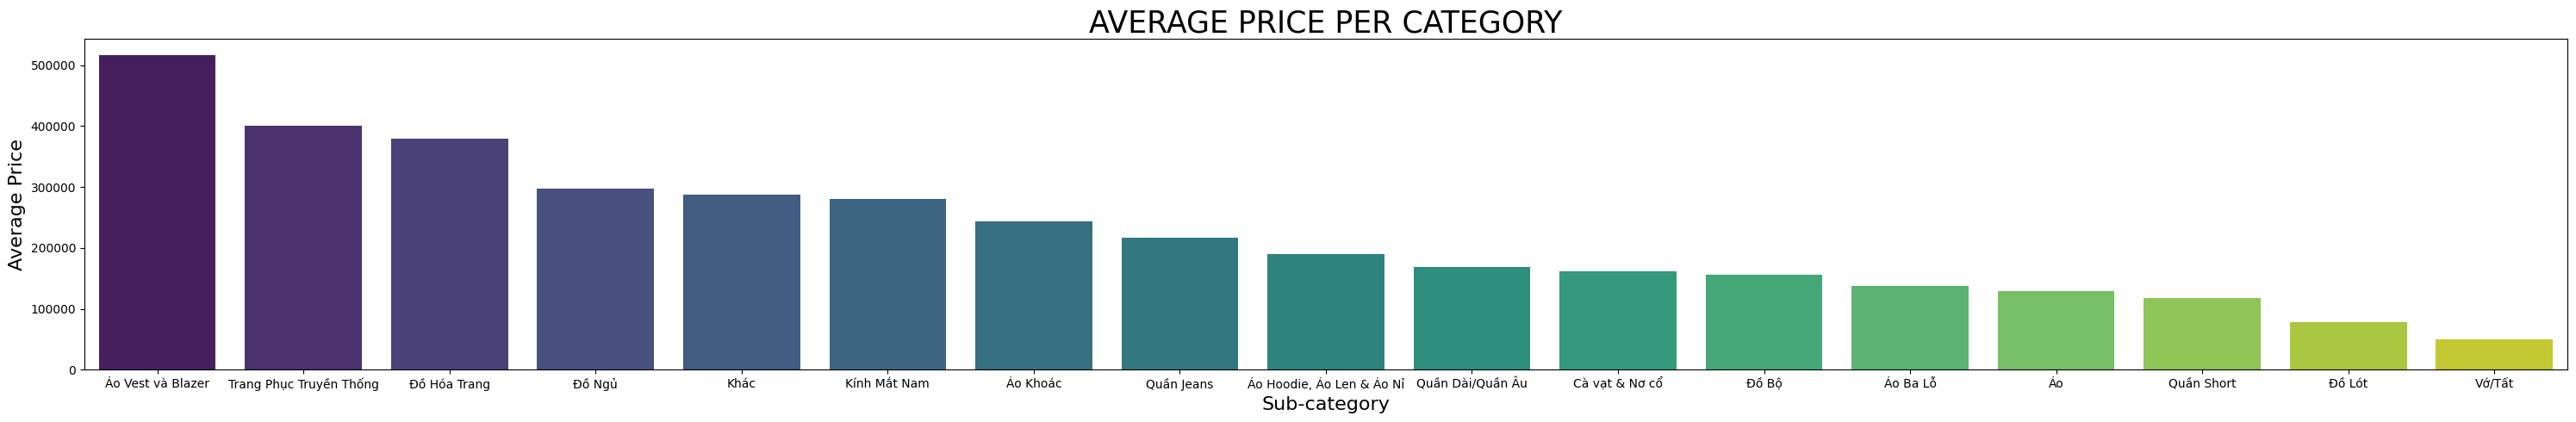

In [ ]:
plt.figure(figsize=(30,5))
sns.barplot(cat_price, y='avg_price', x='sub_category', palette='viridis', ci=None)
plt.xlabel('Sub-category', fontsize=16)
plt.ylabel('Average Price', fontsize=16)
plt.title('AVERAGE PRICE PER CATEGORY', fontsize=25)
plt.tight_layout()
plt.show()

<ipython-input-22-2c7c7446df55>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(cat_price.sort_values(by='avg_rating', ascending=False), y='avg_rating', x='sub_category', palette='viridis', ci=None)
<ipython-input-22-2c7c7446df55>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(cat_price.sort_values(by='avg_rating', ascending=False), y='avg_rating', x='sub_category', palette='viridis', ci=None)


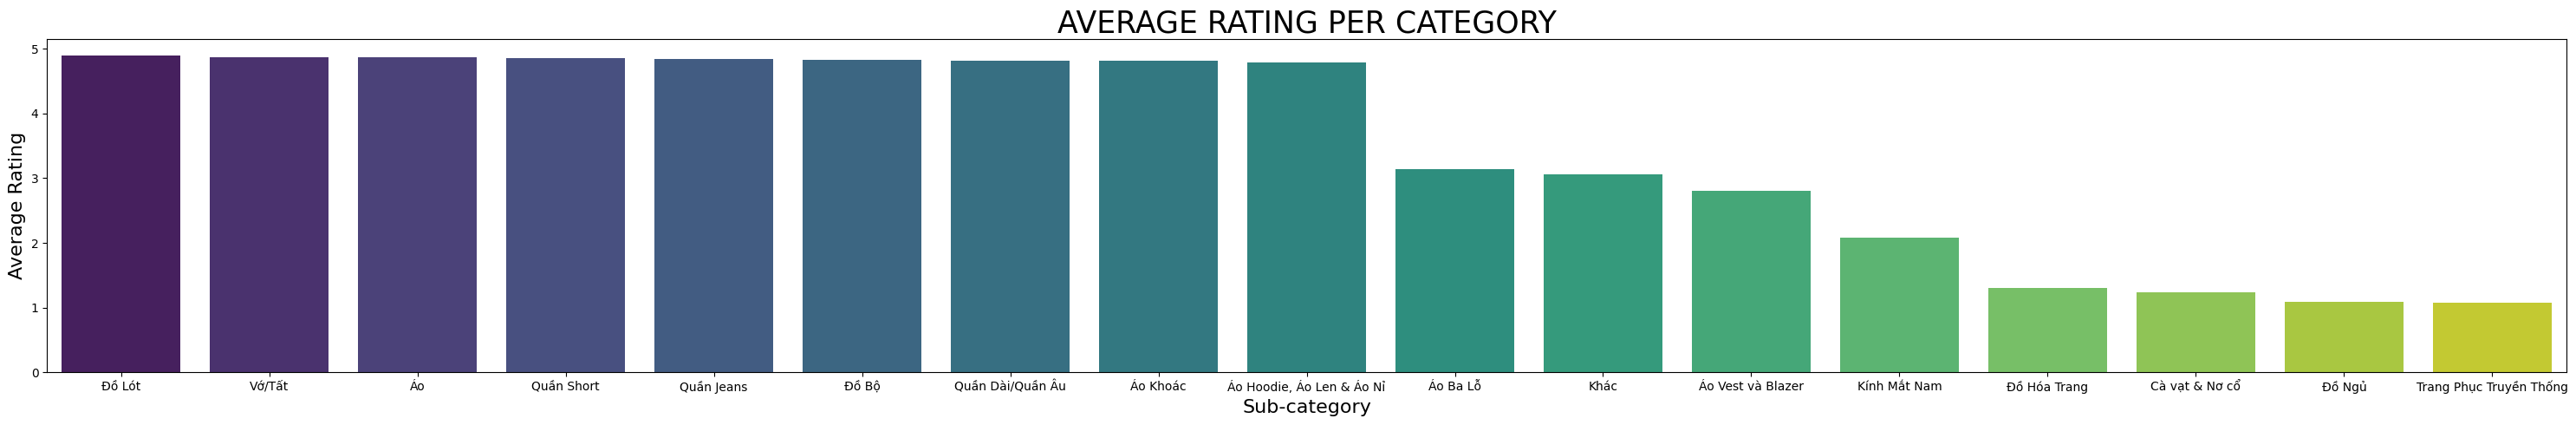

In [ ]:
plt.figure(figsize=(30,5))
sns.barplot(cat_price.sort_values(by='avg_rating', ascending=False), y='avg_rating', x='sub_category', palette='viridis', ci=None)
plt.xlabel('Sub-category', fontsize=16)
plt.ylabel('Average Rating', fontsize=16)
plt.title('AVERAGE RATING PER CATEGORY', fontsize=25)
plt.tight_layout()
plt.show()

### Reviews (file_2 + file_1)

#### Review file_2

In [ ]:
print('Number of unique values:')
for col in file_2.columns:
  print(col, ':', file_2[col].nunique())

Number of unique values:
product_id : 31267
user_id : 650636
user : 650636
rating : 5


- C√≥ 650636 users, th·ª±c hi·ªán review cho t·ªïng c·ªông 31267 s·∫£n ph·∫©m

In [ ]:
file_2.head(5)

product_id  user_id                user  rating
0         190        1        karmakyun2nd       5
1         190        2    tranquangvinh_vv       5
2         190        3  nguyenquoctoan2005       5
3         190        4      nguyenthuyhavi       5
4         190        5        luonganh5595       5

#### Review file_2 + file_1

In [ ]:
df = pd.merge(file_2, file_1[['product_id',	'product_name',	'price', 'sub_category']], on='product_id', how='inner')
df.head()

product_id  user_id                user  rating  \
0         190        1        karmakyun2nd       5   
1         190        2    tranquangvinh_vv       5   
2         190        3  nguyenquoctoan2005       5   
3         190        4      nguyenthuyhavi       5   
4         190        5        luonganh5595       5   

                            product_name    price sub_category  
0  √Åo ba l·ªó thun g√¢n ,form body t√¥n d√°ng  86250.0     √Åo Ba L·ªó  
1  √Åo ba l·ªó thun g√¢n ,form body t√¥n d√°ng  86250.0     √Åo Ba L·ªó  
2  √Åo ba l·ªó thun g√¢n ,form body t√¥n d√°ng  86250.0     √Åo Ba L·ªó  
3  √Åo ba l·ªó thun g√¢n ,form body t√¥n d√°ng  86250.0     √Åo Ba L·ªó  
4  √Åo ba l·ªó thun g√¢n ,form body t√¥n d√°ng  86250.0     √Åo Ba L·ªó

In [ ]:
df.shape

(994751, 7)

In [ ]:
# Check for missing values
df.isnull().sum()

product_id      0
user_id         0
user            0
rating          0
product_name    0
price           0
sub_category    0
dtype: int64

In [ ]:
cat_cols = df.select_dtypes('object').columns
cat_cols

Index(['user', 'product_name', 'sub_category'], dtype='object')

In [ ]:
df[cat_cols].describe()

user                                       product_name  \
count              994751                                             994751   
unique             647647                                              30365   
top     Ng∆∞·ªùi d√πng Shopee  √Åo ch·ªëng n·∫Øng th√¥ng h∆°i nam phi√™n b√°n c·∫£i ti·∫øn...   
freq                12951                                                532   

       sub_category  
count        994751  
unique           17  
top           ƒê·ªì B·ªô  
freq         196135

- C√≥ 647647 users, v·ªõi t·ªïng c·ªông 994751 l∆∞·ª£t mua
- User c√≥ t√™n 'Ng∆∞·ªùi d√πng Shopee' ƒë·ª©ng top 1 mua h√†ng v·ªõi t·ªïng l∆∞·ª£t mua l√† 12,951
- S·∫£n ph·∫©m '√Åo ch·ªëng n·∫Øng th√¥ng h∆° nam phi√™n b·∫£n c·∫£i ti·∫øn' ƒë∆∞·ª£c reviews nhi·ªÅu nh·∫•t v·ªõi 532 l∆∞·ª£t
- Ph√¢n lo·∫°i h√†ng 'ƒê·ªì b·ªô' l√† s·∫£n ph·∫©m ƒë∆∞·ª£c mua nhi·ªÅu nh·∫•t v·ªõi t·ªïng l∆∞·ª£t mua l√† 196,135 l∆∞·ª£t mua

In [ ]:
# Total reviews of each products
count_reviews = df.groupby('product_name').agg(count_no_reviews=('rating', 'count')).sort_values(by='count_no_reviews', ascending=False)
count_reviews

count_no_reviews
product_name                                                        
√Åo ch·ªëng n·∫Øng th√¥ng h∆°i nam phi√™n b√°n c·∫£i ti·∫øn ...               532
√Åo kho√°c Bomber d√π Unisex Ulzzang nam n·ªØ Nhi·ªÅu ...               528
H·ªôp 10 ƒë√¥i t·∫•t ch·ªëng h√¥i ch√¢n h√†ng xu·∫•t Nh·∫≠t ( ...               508
√Åo kho√°c gi√≥ nam 2 l·ªõp ch·ªëng n∆∞·ªõc 2021 , ch·∫•t g...               508
√Åo kho√°c nam n·ªØ unisex 2 l·ªõp ch·ªëng n∆∞·ªõc cao c·∫•p...               486
...                                                              ...
√Åo Thun Tay l·ª° üíñùë≠ùëπùë¨?ùë∫ùëØùë∞ùë∑ üíñ √Åo thun M√®o Ami B·ª•ng...                 1
√Åo Thun Tay Ng·∫Øn Th·ªùi Trang D√†nh Cho Nam                           1
√Åo Thun Tay Ng·∫Øn In H√¨nh Th·ªùi Trang Tr·∫ª Trung                      1
√Åo Thun Tay Ng·∫Øn In H√¨nh Nh√¢n V·∫≠t Phim Anime Vt...                 1
B·ªô Cavat nam 8cm qu√† t·∫∑ng Giangpkc36 - H·ªôp c√† ...                 1

[30365 rows x 1 columns]

In [ ]:
# Top 5 Number of Reviews per Product
top_5_reviews = count_reviews.sort_values(by='count_no_reviews', ascending=False).head(5)

- √Åo ch·ªëng n·∫Øng th√¥ng h∆°i nam phi√™n b·∫£n c·∫£i ti·∫øn m·ªõi nh·∫•t l√† s·∫£n ph·∫©m c√≥ nhi·ªÅu l∆∞·ª£t ƒë√°nh gi√° t·ª´ KH ƒë√£ mua nh·∫•t

<ipython-input-35-1e3e1458017b>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(count_reviews.sort_values(by='count_no_reviews', ascending=False).head(5), y='count_no_reviews', x='product_name', palette='viridis', ci=None)
<ipython-input-35-1e3e1458017b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(count_reviews.sort_values(by='count_no_reviews', ascending=False).head(5), y='count_no_reviews', x='product_name', palette='viridis', ci=None)


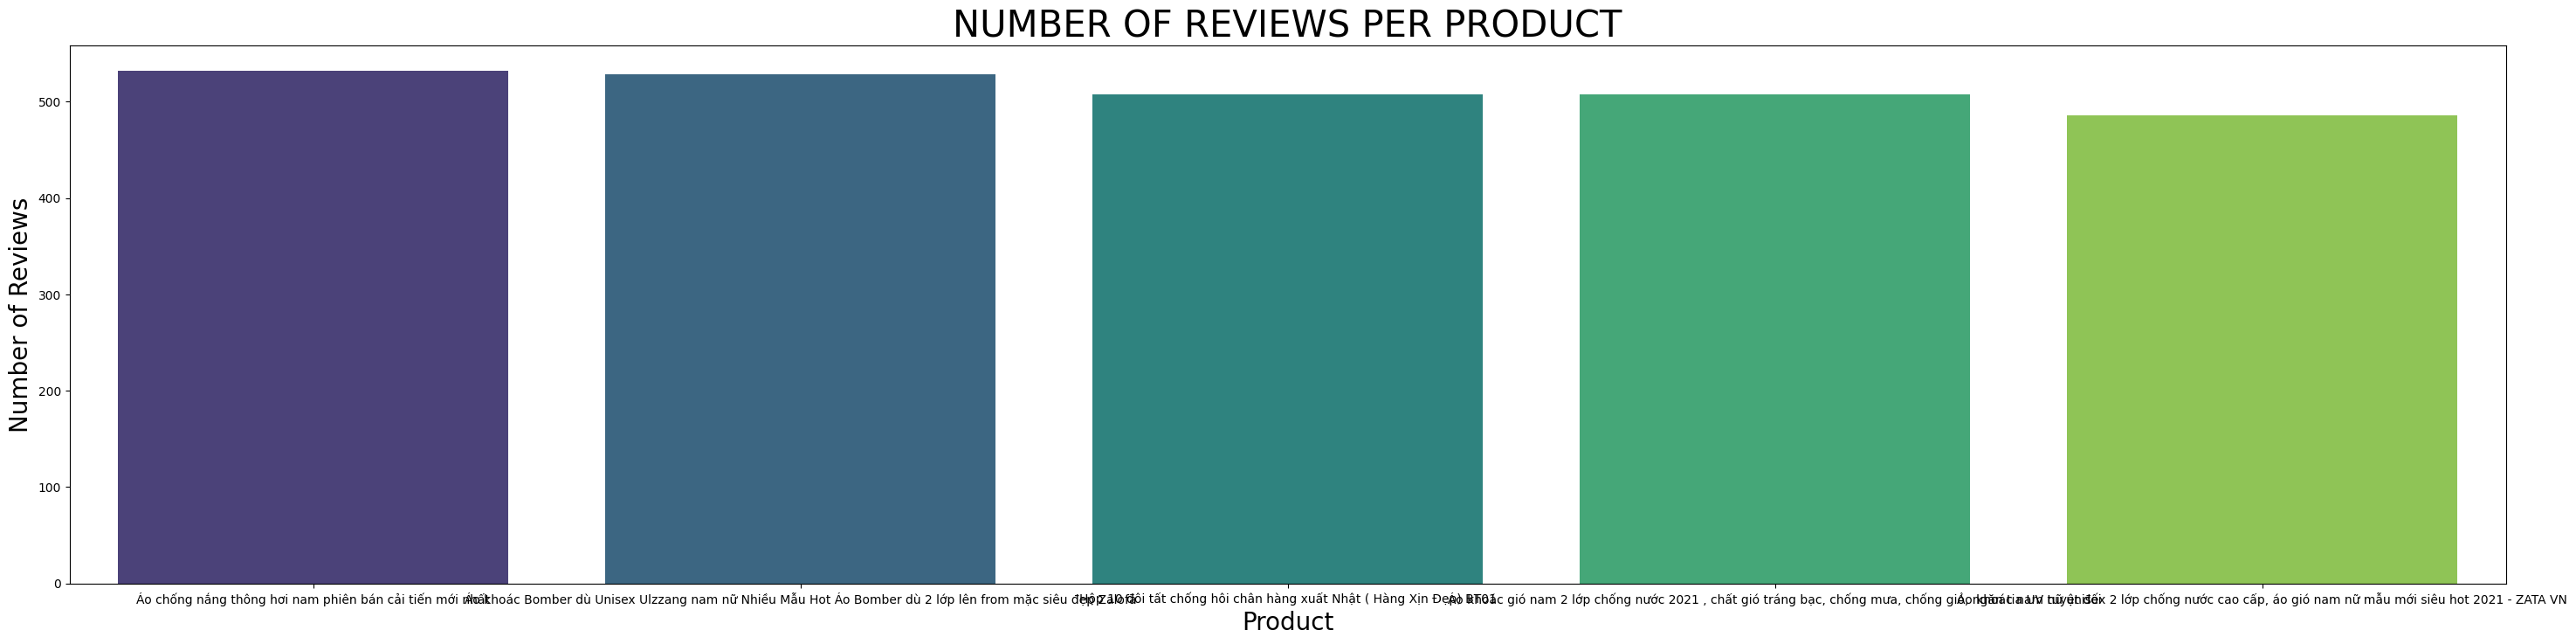

In [ ]:
# plt.figure(figsize=(36,8))
# sns.barplot(count_reviews.sort_values(by='count_no_reviews', ascending=False).head(5), y='count_no_reviews', x='product_name', palette='viridis', ci=None)
# plt.xlabel('Product', fontsize=20)
# plt.ylabel('Number of Reviews', fontsize=20)
# plt.title('NUMBER OF REVIEWS PER PRODUCT', fontsize=30)
# plt.show()

<ipython-input-32-663344705c9b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=top_5_reviews.index.astype(str),


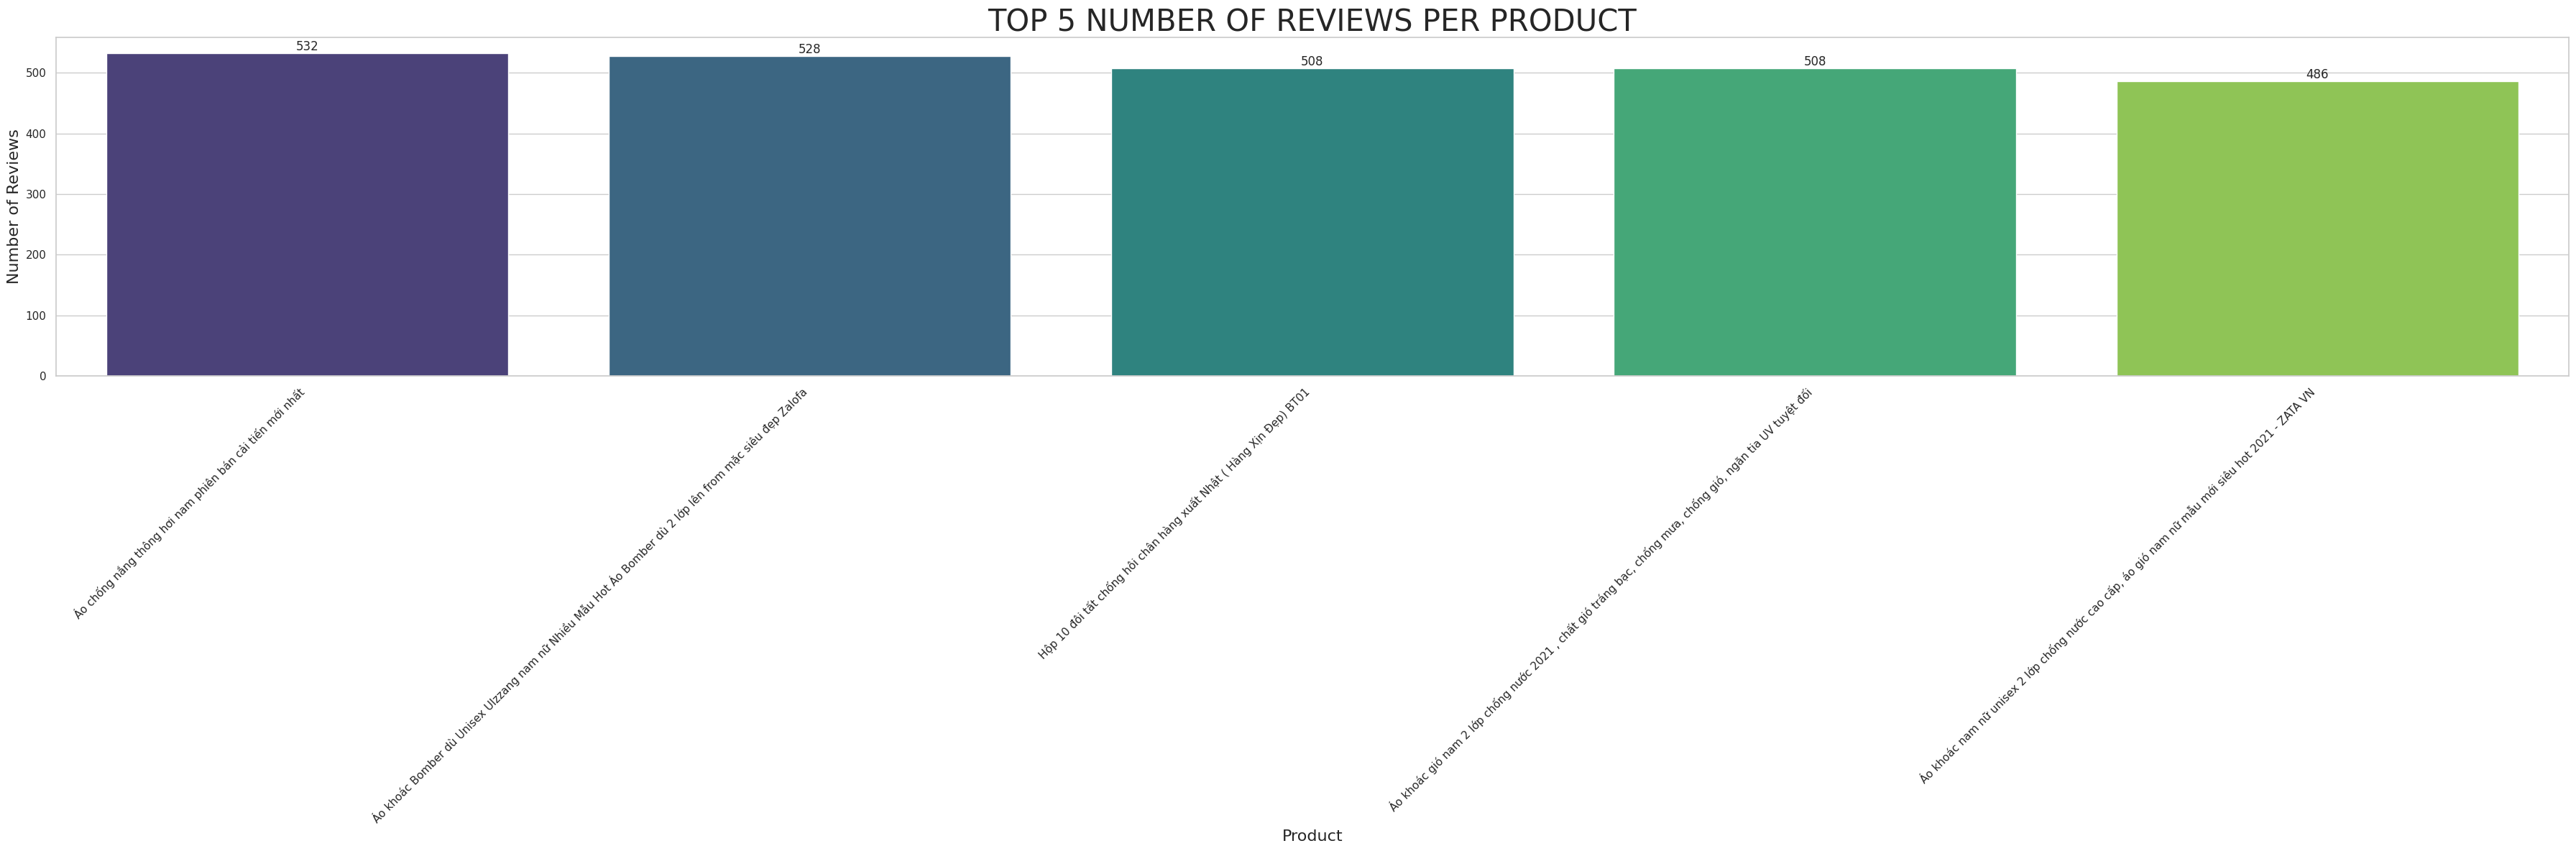

In [ ]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=(36, 12))
barplot = sns.barplot(x=top_5_reviews.index.astype(str),
                      y=top_5_reviews['count_no_reviews'],
                      palette='viridis',
                      order=top_5_reviews.index.astype(str))
plt.xlabel('Product', fontsize=16)
plt.ylabel('Number of Reviews', fontsize=16)
plt.title('TOP 5 NUMBER OF REVIEWS PER PRODUCT', fontsize=30)
plt.xticks(rotation=45, ha='right')

for container in barplot.containers:
    barplot.bar_label(container, fmt='%.0f')

plt.tight_layout()
plt.show()

In [ ]:
# T·ªïng l∆∞·ª£t mua h√†ng t√≠nh theo rating/review. C·ª© m·ªói m·ªôt l∆∞·ª£t rating s·∫Ω ƒë∆∞·ª£c t√≠nh th√†nh 1 l∆∞·ª£t mua
total_purchases = df['rating'].count()
print(total_purchases)

994751


In [ ]:
# Users with the most purchases and their purchase amount
top_users = df[['user_id', 'rating', 'price']].groupby('user_id').agg(purchases=('rating', 'count'), purchase_amount=('price', 'sum')).sort_values(by='purchase_amount', ascending=False)
top_users[['purchases', 'purchase_amount']].head()

purchases  purchase_amount
user_id                            
199          12951     1.622941e+09
831           2333     3.023502e+08
159           2375     2.969282e+08
324           2228     2.780948e+08
860           1950     2.462154e+08

In [ ]:
top_10_users_by_purchases = top_users.sort_values(by='purchases', ascending=False).head(10)

In [ ]:
# Format price
top_10_users_by_purchases['purchase amount'] = top_users['purchase_amount'].apply(format_currency)
top_10_users_by_purchases[['purchases', 'purchase amount']].head(10)

purchases purchase amount
user_id                           
199          12951   1,622,941,264
159           2375     296,928,208
831           2333     302,350,177
324           2228     278,094,806
164           1953     243,017,554
860           1950     246,215,378
1938          1759     219,329,800
241           1725     215,445,624
167           1718     215,995,246
40            1689     219,887,098

- User 199 l√† ng∆∞·ªùi mua nhi·ªÅu nh·∫•t v·ªõi t·ªïng s·ªë l·∫ßn mua l√† 12,951 l·∫ßn, t∆∞∆°ng ·ª©ng v·ªõi 1,6 t·ª∑ ƒë·ªìng

<ipython-input-37-8d65d6ef8a35>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=top_10_users_by_purchases.index.astype(str),


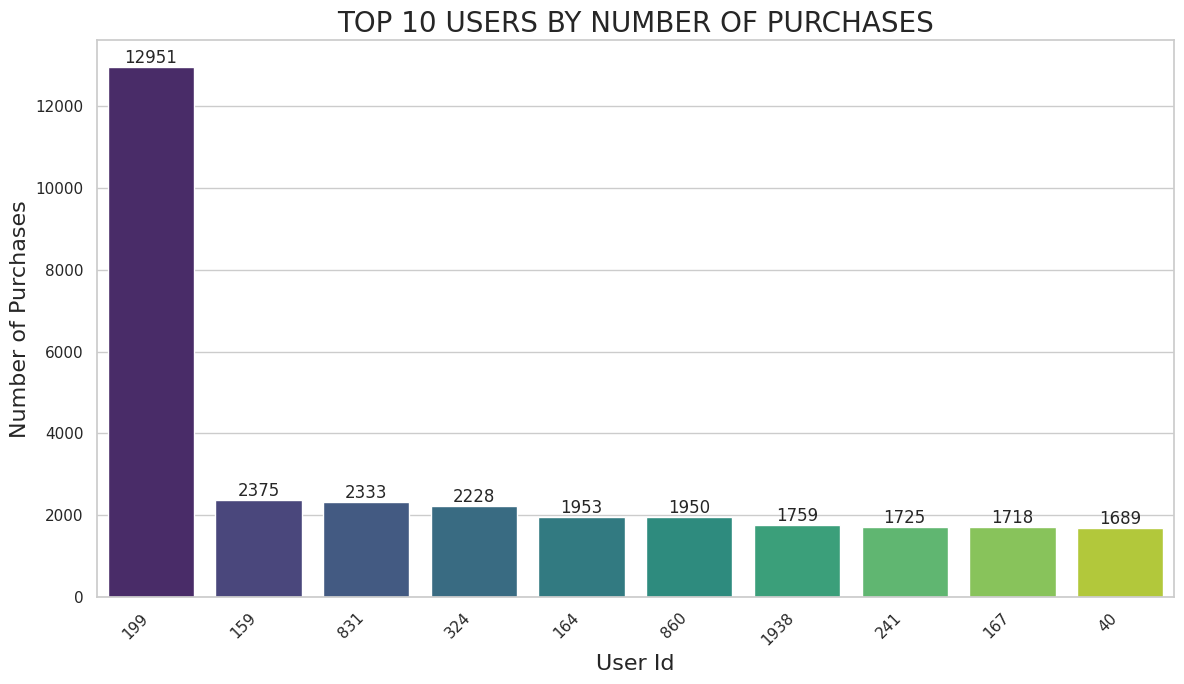

In [ ]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=(12, 7))
barplot = sns.barplot(x=top_10_users_by_purchases.index.astype(str),
                      y=top_10_users_by_purchases['purchases'],
                      palette='viridis',
                      order=top_10_users_by_purchases.index.astype(str))
plt.xlabel('User Id', fontsize=16)
plt.ylabel('Number of Purchases', fontsize=16)
plt.title('TOP 10 USERS BY NUMBER OF PURCHASES', fontsize=20)
plt.xticks(rotation=45, ha='right')

for container in barplot.containers:
    barplot.bar_label(container, fmt='%.0f')

plt.tight_layout()
plt.show()

In [ ]:
top_10_users_by_purchase_amount = top_users.sort_values(by='purchase_amount', ascending=False).head(10)

In [ ]:
# Format price
top_10_users_by_purchase_amount['purchase amount'] = top_users['purchase_amount'].apply(format_currency)
top_10_users_by_purchase_amount[['purchases', 'purchase amount']].head(10)

purchases purchase amount
user_id                           
199          12951   1,622,941,264
831           2333     302,350,177
159           2375     296,928,208
324           2228     278,094,806
860           1950     246,215,378
164           1953     243,017,554
40            1689     219,887,098
1938          1759     219,329,800
167           1718     215,995,246
241           1725     215,445,624

<ipython-input-40-48bdecfc8aef>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=top_10_users_by_purchase_amount.index.astype(str),


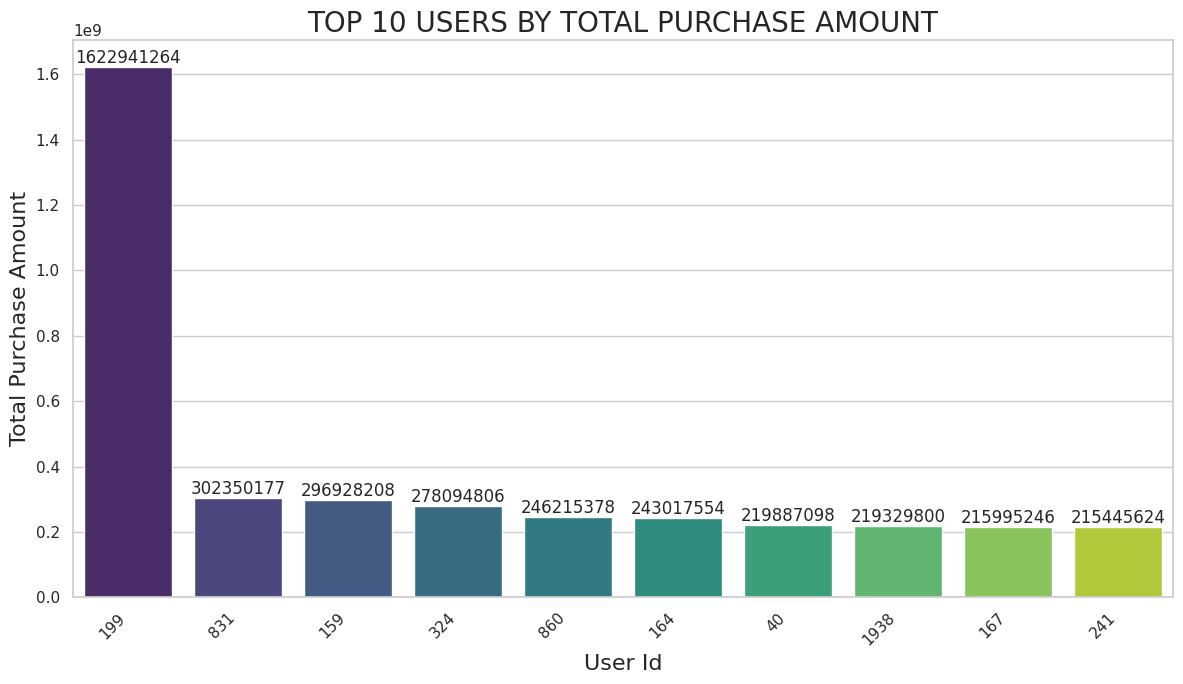

In [ ]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=(12, 7))
barplot = sns.barplot(x=top_10_users_by_purchase_amount.index.astype(str),
                      y=top_10_users_by_purchase_amount['purchase_amount'],
                      palette='viridis',
                      order=top_10_users_by_purchase_amount.index.astype(str))
plt.xlabel('User Id', fontsize=16)
plt.ylabel('Total Purchase Amount', fontsize=16)
plt.title('TOP 10 USERS BY TOTAL PURCHASE AMOUNT', fontsize=20)
plt.xticks(rotation=45, ha='right')

for container in barplot.containers:
    barplot.bar_label(container, fmt='%.0f')

plt.tight_layout()
plt.show()

In [ ]:
# Top revenue contributors
top_contributors = df.groupby('sub_category').agg({'product_name': lambda x: x.mode().iloc[0], 'rating': 'count', 'price': 'sum'})
top_contributors = top_contributors.rename(columns={'product_name': 'most_reviewed_product', 'rating': 'purchases', 'price': 'total_revenue'}).sort_values(by='total_revenue', ascending=False)
top_contributors['percent_amount'] = top_contributors['total_revenue']/sum(top_contributors['total_revenue'])*100
top_contributors

most_reviewed_product  \
sub_category                                                                   
ƒê·ªì B·ªô                      Set ƒë·ªì nam B·ªô Qu·∫ßn √Åo Th·ªÉ Thao Nam , n·ªØ th·ªùi t...   
√Åo Kho√°c                   √Åo ch·ªëng n·∫Øng th√¥ng h∆°i nam phi√™n b√°n c·∫£i ti·∫øn...   
√Åo                         √Åo s∆° mi nam n·ªØ d√†i tay Unisex Basic m√†u tr·∫Øng...   
Qu·∫ßn Jeans                 Qu·∫ßn jean nam baggy ki·ªÉu ·ªëng r·ªông d√°ng su√¥ng c...   
Qu·∫ßn D√†i/Qu·∫ßn √Çu           Qu·∫ßn Th·ªÉ Thao Nam 3 S·ªçc Qu·∫ßn Nam Thu ƒê√¥ng Co G...   
√Åo Hoodie, √Åo Len & √Åo N·ªâ  √Åo kho√°c n·ªâ hoodie tr∆°n Unisex - Hoodie zip fo...   
V·ªõ/T·∫•t                     H·ªôp 10 ƒë√¥i t·∫•t ch·ªëng h√¥i ch√¢n h√†ng xu·∫•t Nh·∫≠t (...   
Kh√°c                       M≈© L∆∞·ª°i Trai Ph·∫£n Quang LINJW D√†nh Cho Nam V√† ...   
ƒê·ªì L√≥t                     Qu·∫ßn l√≥t nam m·ªÅm m·∫°i co gi√£n, S·ªãp nam ƒë√πi Full...   
Qu·∫ßn Short                 QU·∫¶N SHORT KAKI NAM CO GI√ÉN CAO C·∫§P B·∫¢NG M√ÄU P...   
√Åo Vest v√† Blazer          √Åo Blazer Nam Form R·ªông MrHero d√†i tay d√°ng un...   
K√≠nh M·∫Øt Nam                                     M·∫ÆT K√çNH NAM CAO C·∫§P P8738V   
Trang Ph·ª•c Truy·ªÅn Th·ªëng                       √Åo YUKATA Nh·∫≠t B·∫£n form Unisex   
ƒê·ªì H√≥a Trang               Attack On Titan Cosplay Shingeki No Kyojin Clo...   
√Åo Ba L·ªó                                  √ÅO BA L·ªñ H√ÄNG VI·ªÜT NAM 100% COTTON   
ƒê·ªì Ng·ªß                                                 B·ªô ng·ªß nam in ch·ªØ nh·ªè   
C√† v·∫°t & N∆° c·ªï             CaÃÄ VaÃ£t Nam BaÃân NhoÃâ 5cm HaÃÄn Qu√¥ÃÅc - Cavat ...   

                           purchases  total_revenue  percent_amount  
sub_category                                                         
ƒê·ªì B·ªô                         196135   2.728036e+10       21.539333  
√Åo Kho√°c                       81928   1.769755e+10       13.973180  
√Åo                            107339   1.336183e+10       10.549892  
Qu·∫ßn Jeans                     62617   1.278576e+10       10.095056  
Qu·∫ßn D√†i/Qu·∫ßn √Çu               72755   1.077093e+10        8.504237  
√Åo Hoodie, √Åo Len & √Åo N·ªâ      51309   8.979486e+09        7.089793  
V·ªõ/T·∫•t                        160658   6.258613e+09        4.941516  
Kh√°c                           56998   5.997269e+09        4.735170  
ƒê·ªì L√≥t                         70405   5.255857e+09        4.149786  
Qu·∫ßn Short                     50196   5.228978e+09        4.128563  
√Åo Vest v√† Blazer               9221   2.977745e+09        2.351092  
K√≠nh M·∫Øt Nam                   17763   2.870332e+09        2.266284  
Trang Ph·ª•c Truy·ªÅn Th·ªëng        14987   2.421957e+09        1.912267  
ƒê·ªì H√≥a Trang                   10468   1.960682e+09        1.548066  
√Åo Ba L·ªó                       13928   1.153587e+09        0.910820  
ƒê·ªì Ng·ªß                          5945   8.728930e+08        0.689197  
C√† v·∫°t & N∆° c·ªï                 12099   7.798702e+08        0.615750

In [ ]:
top_contributors['total revenue'] = top_contributors['total_revenue'].apply(format_currency)
top_contributors[['most_reviewed_product', 'purchases', 'total revenue', 'percent_amount']].head()

most_reviewed_product  \
sub_category                                                          
ƒê·ªì B·ªô             Set ƒë·ªì nam B·ªô Qu·∫ßn √Åo Th·ªÉ Thao Nam , n·ªØ th·ªùi t...   
√Åo Kho√°c          √Åo ch·ªëng n·∫Øng th√¥ng h∆°i nam phi√™n b√°n c·∫£i ti·∫øn...   
√Åo                √Åo s∆° mi nam n·ªØ d√†i tay Unisex Basic m√†u tr·∫Øng...   
Qu·∫ßn Jeans        Qu·∫ßn jean nam baggy ki·ªÉu ·ªëng r·ªông d√°ng su√¥ng c...   
Qu·∫ßn D√†i/Qu·∫ßn √Çu  Qu·∫ßn Th·ªÉ Thao Nam 3 S·ªçc Qu·∫ßn Nam Thu ƒê√¥ng Co G...   

                  purchases   total revenue  percent_amount  
sub_category                                                 
ƒê·ªì B·ªô                196135  27,280,362,712       21.539333  
√Åo Kho√°c              81928  17,697,549,394       13.973180  
√Åo                   107339  13,361,829,098       10.549892  
Qu·∫ßn Jeans            62617  12,785,761,923       10.095056  
Qu·∫ßn D√†i/Qu·∫ßn √Çu      72755  10,770,930,866        8.504237

<ipython-input-43-c1c4bce852a0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_contributors.sort_values(by='purchases', ascending=False), x='sub_category', y='purchases', ax=axes[0], palette='viridis')
<ipython-input-43-c1c4bce852a0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_contributors, x='sub_category', y='total_revenue', ax=axes[1], palette='viridis')


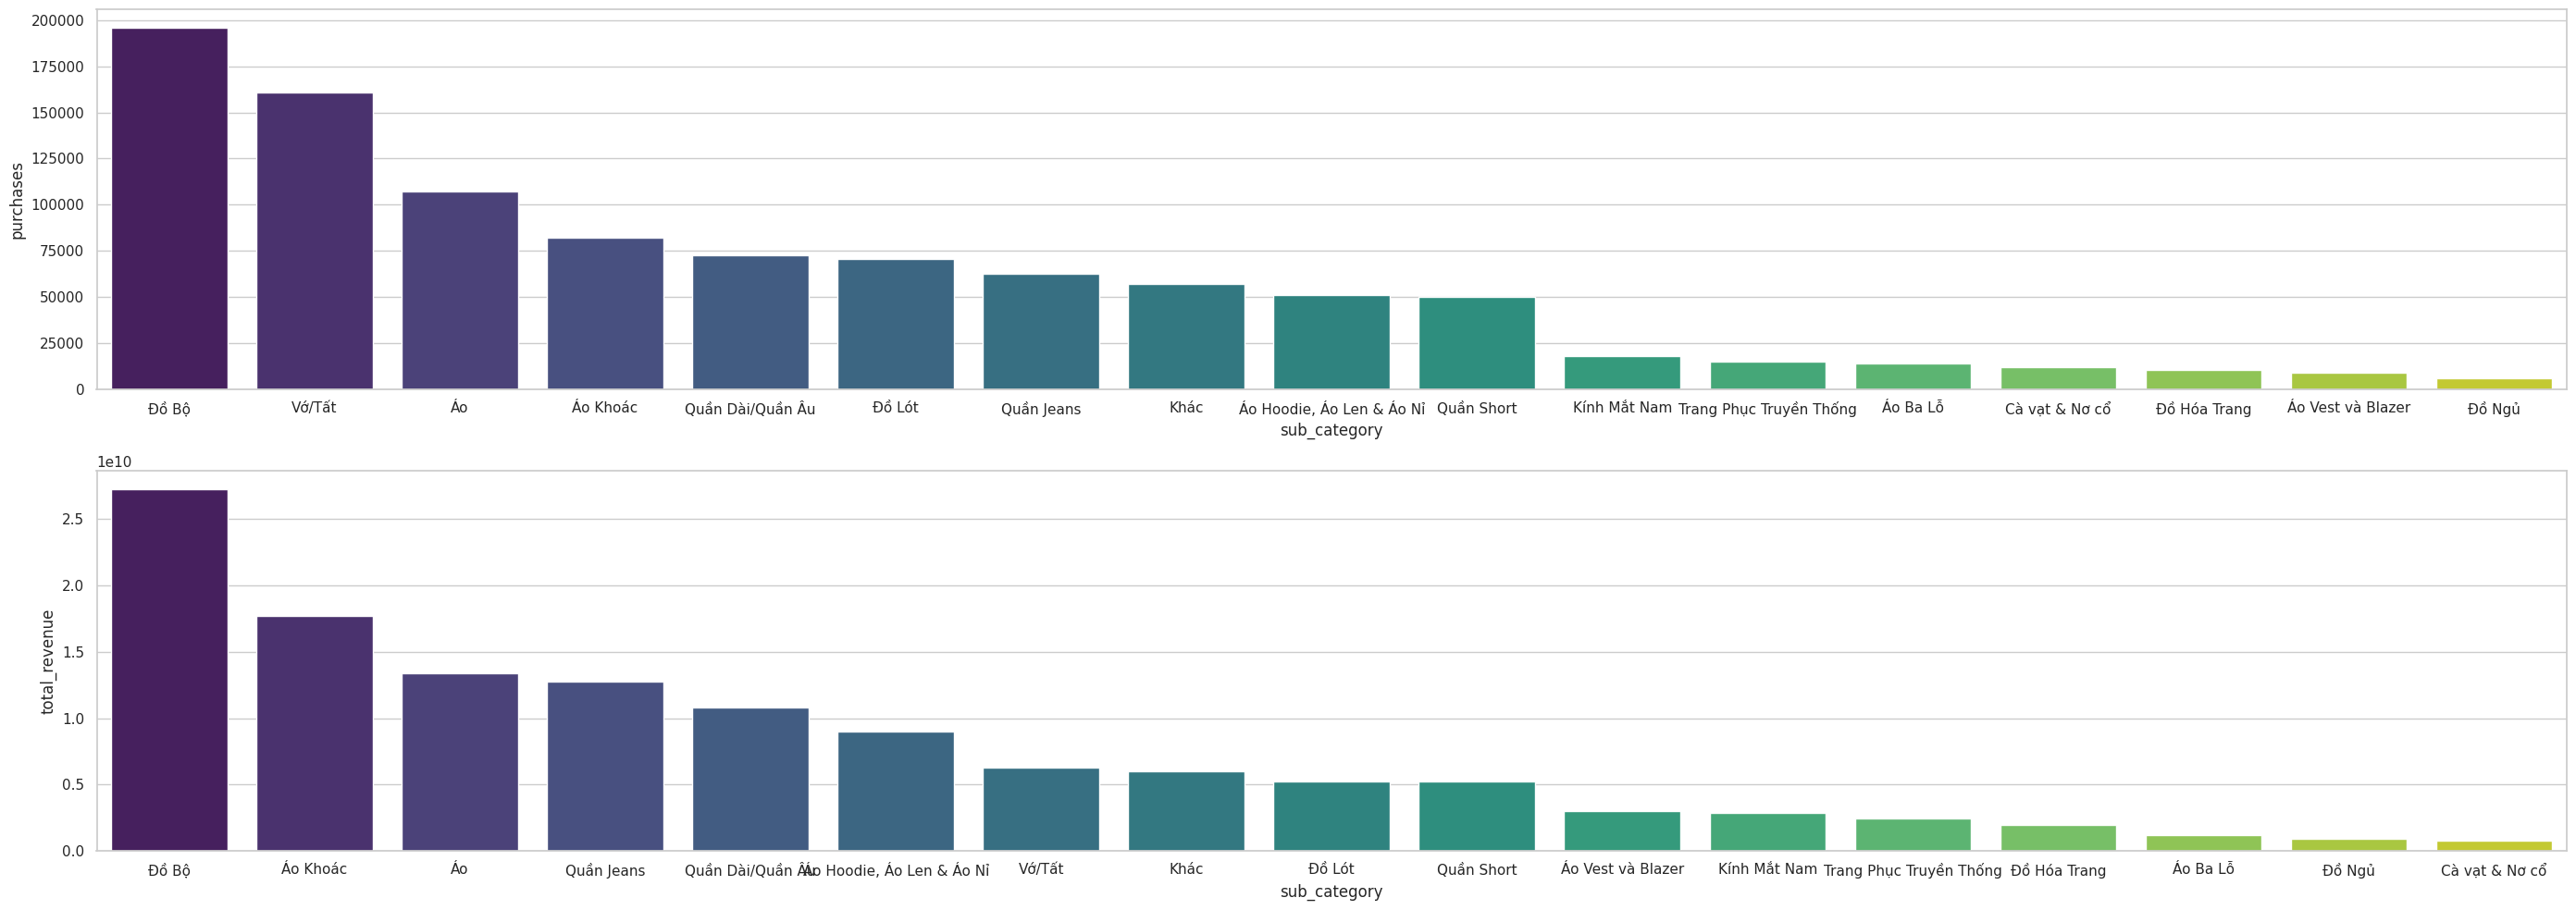

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(28, 10))
sns.barplot(data=top_contributors.sort_values(by='purchases', ascending=False), x='sub_category', y='purchases', ax=axes[0], palette='viridis')
sns.barplot(data=top_contributors, x='sub_category', y='total_revenue', ax=axes[1], palette='viridis')
plt.tight_layout()
plt.show()

- M·∫∑t h√†ng 'ƒê·ªì B·ªô' c√≥ t·ªïng s·ªë l∆∞·ª£t mua l√† 196,135 l·∫ßn, chi·∫øm doanh thu cao nh·∫•t kho·∫£ng 27,3 t·ª∑ ƒë·ªìng

<ipython-input-44-6fba70034d77>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='rating', palette='viridis')


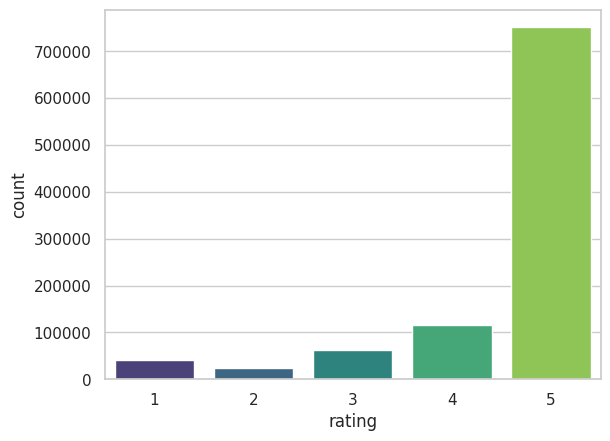

In [ ]:
# Th·ªëng k√™ rating
sns.countplot(data=df, x='rating', palette='viridis')
plt.show()

In [ ]:
# Top 5 s·∫£n ph·∫©m ƒë∆∞·ª£c ƒë√°nh gi√° 5 sao nhi·ªÅu nh·∫•t
df[df['rating']==5]['product_name'].value_counts().head(5)

product_name
Set ƒë·ªì nam B·ªô Qu·∫ßn √Åo Th·ªÉ Thao Nam , n·ªØ th·ªùi trang        369
S√©t B·ªô qu·∫ßn √°o nam - v·∫£i th·∫•m m·ªì h√¥i t·ªët                  318
B·ªô th·ªÉ thao nam                                           222
1 ƒê√îI V·ªö si√™u ng·∫Øn gi√†nh cho nam gi·ªõi - M√ÄU NG·∫™U NHI√äN    184
Qu·∫ßn √°o kh√°ch ƒë·∫∑t livestream                              178
Name: count, dtype: int64

<ipython-input-46-79db065c2a3f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df[df['rating']==5]['product_name'].value_counts().head().reset_index(), y='count', x='product_name', palette='viridis')


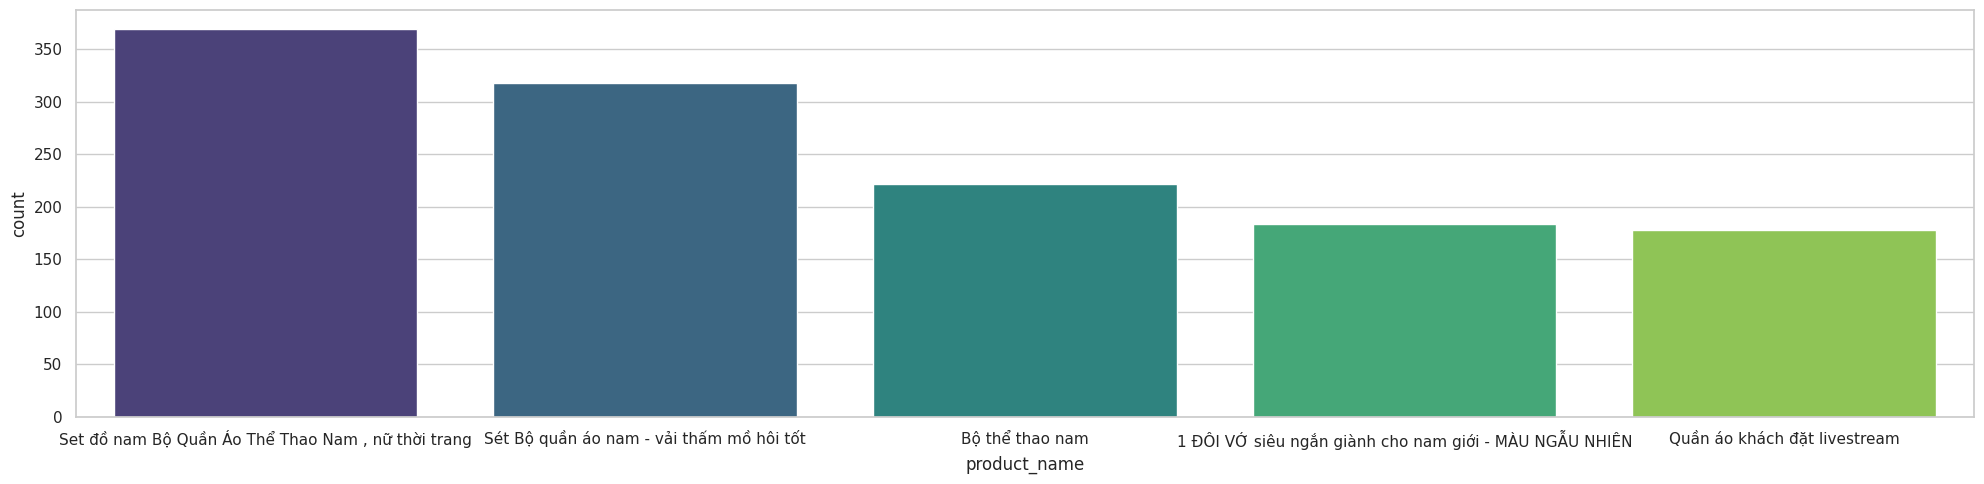

In [ ]:
plt.figure(figsize=(20, 5))
sns.barplot(data=df[df['rating']==5]['product_name'].value_counts().head().reset_index(), y='count', x='product_name', palette='viridis')
plt.tight_layout()

## Building the Content-Based Recommendation System

### Underthesea

In [ ]:
from underthesea import word_tokenize, pos_tag, sent_tokenize

In [ ]:
df_new = file_1_n.copy()
df_new.head()

product_id                                       product_name  \
0         190              √Åo ba l·ªó thun g√¢n ,form body t√¥n d√°ng   
1         191  √Åo Ba L·ªó Nam Tr·∫Øng Ch·∫•t Cotton Si√™u M√°t, Si√™u ƒê·∫πp   
2         192  √Åo Ba L·ªó Nam Tyasuo ch·∫•t v·∫£i co d√£n m√°t, kh√¥ng...   
3         193                 √ÅO BA L·ªñ H√ÄNG VI·ªÜT NAM 100% COTTON   
4         194  √Åo Thun Nam Th·ªÉ Thao Ba L·ªó M·∫´u M·ªõi Si√™u ƒê·∫πp (B...   

         category sub_category  \
0  Th·ªùi Trang Nam     √Åo Ba L·ªó   
1  Th·ªùi Trang Nam     √Åo Ba L·ªó   
2  Th·ªùi Trang Nam     √Åo Ba L·ªó   
3  Th·ªùi Trang Nam     √Åo Ba L·ªó   
4  Th·ªùi Trang Nam     √Åo Ba L·ªó   

                                                link    price  rating  \
0  https://shopee.vn/%C3%81o-ba-l%E1%BB%97-thun-g...  86250.0     4.9   
1  https://shopee.vn/%C3%81o-Ba-L%E1%BB%97-Nam-Tr...  26800.0     4.9   
2  https://shopee.vn/%C3%81o-Ba-L%E1%BB%97-Nam-Ty...  39500.0     4.8   
3  https://shopee.vn/%C3%81O-BA-L%E1%BB%96-H%C3%8...  16500.0     4.8   
4  https://shopee.vn/%C3%81o-Thun-Nam-Th%E1%BB%83...  45000.0     4.8   

                                         description  
0  Danh M·ª•c\nShopee\nTh·ªùi Trang Nam\n√Åo Ba L·ªó\nCh...  
1  Danh M·ª•c\nShopee\nTh·ªùi Trang Nam\n√Åo Ba L·ªó\nXu...  
2  Danh M·ª•c\nShopee\nTh·ªùi Trang Nam\n√Åo Ba L·ªó\nTh...  
3  Danh M·ª•c\nShopee\nTh·ªùi Trang Nam\n√Åo Ba L·ªó\nCh...  
4  Danh M·ª•c\nShopee\nTh·ªùi Trang Nam\n√Åo Ba L·ªó\nCh...

In [ ]:
# H√†m ki·ªÉm tra t·ª´ c√≥ ph·∫£i l√† t·ª´ ti·∫øng Vi·ªát "s·∫°ch"
def is_valid_vietnamese(word):
    vietnamese_chars = (
        "a-zA-Z0-9_"
        "√†√°·∫°·∫£√£√¢·∫ß·∫•·∫≠·∫©·∫´ƒÉ·∫±·∫Ø·∫∑·∫≥·∫µ"
        "√®√©·∫π·∫ª·∫Ω√™·ªÅ·∫ø·ªá·ªÉ·ªÖ"
        "√¨√≠·ªã·ªâƒ©"
        "√≤√≥·ªç·ªè√µ√¥·ªì·ªë·ªô·ªï·ªó∆°·ªù·ªõ·ª£·ªü·ª°"
        "√π√∫·ª•·ªß≈©∆∞·ª´·ª©·ª±·ª≠·ªØ"
        "·ª≥√Ω·ªµ·ª∑·ªπ"
        "ƒë"
        "√Ä√Å·∫†·∫¢√É√Ç·∫¶·∫§·∫¨·∫®·∫™ƒÇ·∫∞·∫Æ·∫∂·∫≤·∫¥"
        "√à√â·∫∏·∫∫·∫º√ä·ªÄ·∫æ·ªÜ·ªÇ·ªÑ"
        "√å√ç·ªä·ªàƒ®"
        "√í√ì·ªå·ªé√ï√î·ªí·ªê·ªò·ªî·ªñ∆†·ªú·ªö·ª¢·ªû·ª†"
        "√ô√ö·ª§·ª¶≈®∆Ø·ª™·ª®·ª∞·ª¨·ªÆ"
        "·ª≤√ù·ª¥·ª∂·ª∏"
        "ƒê"
    )
    pattern = f'^[{vietnamese_chars}]+$'
    return re.match(pattern, word) is not None

In [ ]:
# H√†m x·ª≠ l√Ω m·ªôt m√¥ t·∫£
def filter_vietnamese_words(text):
    if not isinstance(text, str):
        return ''
    words = text.split()
    clean_words = [w for w in words if is_valid_vietnamese(w)]
    return ' '.join(clean_words)

In [ ]:
# √Åp d·ª•ng l·ªçc cho c·ªôt 'product_name'
df_new['cleaned_product_name'] = df_new['product_name'].apply(filter_vietnamese_words)

In [ ]:
print(df_new[['product_name', 'cleaned_product_name']])

                                            product_name  \
0                  √Åo ba l·ªó thun g√¢n ,form body t√¥n d√°ng   
1      √Åo Ba L·ªó Nam Tr·∫Øng Ch·∫•t Cotton Si√™u M√°t, Si√™u ƒê·∫πp   
2      √Åo Ba L·ªó Nam Tyasuo ch·∫•t v·∫£i co d√£n m√°t, kh√¥ng...   
3                     √ÅO BA L·ªñ H√ÄNG VI·ªÜT NAM 100% COTTON   
4      √Åo Thun Nam Th·ªÉ Thao Ba L·ªó M·∫´u M·ªõi Si√™u ƒê·∫πp (B...   
...                                                  ...   
49658  T·∫•t v·ªõ nam c·ªï cao cao c·∫•p, t·∫•t v·ªõ ƒëi gi√†y c√¥ng...   
49659  T·∫•t Nam Livan Sport Ch·∫•t Li·ªáu Bamboo Kh√°ng Khu...   
49660  Combo 3 ƒê√¥i T·∫•t ( V·ªõ ) H√†i Ch·ªëng H√¥i Ch√¢n Uni ...   
49661                  H·ªôp 10 ƒë√¥i t·∫•t ch·ªëng h√¥i ch√¢n nam   
49662      Combo 5 ƒë√¥i t·∫•t nam n·ªØ cao c·∫•p kh√¥ng h√¥i ch√¢n   

                                    cleaned_product_name  
0                        √Åo ba l·ªó thun g√¢n body t√¥n d√°ng  
1           √Åo Ba L·ªó Nam Tr·∫Øng Ch·∫•t Cotton Si√

In [ ]:
df_new['cleaned_product_name'] = df_new['cleaned_product_name'].apply(lambda x:x.lower())
df_new['cleaned_product_name'].head()

0                      √°o ba l·ªó thun g√¢n body t√¥n d√°ng
1         √°o ba l·ªó nam tr·∫Øng ch·∫•t cotton si√™u si√™u ƒë·∫πp
2    √°o ba l·ªó nam tyasuo ch·∫•t v·∫£i co d√£n kh√¥ng m·ªÅm m·ªãn
3                        √°o ba l·ªó h√†ng vi·ªát nam cotton
4          √°o thun nam th·ªÉ thao ba l·ªó m·∫´u m·ªõi si√™u ƒë·∫πp
Name: cleaned_product_name, dtype: object

In [ ]:
# √Åp d·ª•ng l·ªçc cho c·ªôt 'description'
df_new['cleaned_description'] = df_new['description'].apply(filter_vietnamese_words)

In [ ]:
print(df_new[['description', 'cleaned_description']])

                                             description  \
0      Danh M·ª•c\nShopee\nTh·ªùi Trang Nam\n√Åo Ba L·ªó\nCh...   
1      Danh M·ª•c\nShopee\nTh·ªùi Trang Nam\n√Åo Ba L·ªó\nXu...   
2      Danh M·ª•c\nShopee\nTh·ªùi Trang Nam\n√Åo Ba L·ªó\nTh...   
3      Danh M·ª•c\nShopee\nTh·ªùi Trang Nam\n√Åo Ba L·ªó\nCh...   
4      Danh M·ª•c\nShopee\nTh·ªùi Trang Nam\n√Åo Ba L·ªó\nCh...   
...                                                  ...   
49658  Danh M·ª•c\nShopee\nTh·ªùi Trang Nam\nV·ªõ/T·∫•t\nChi·ªÅ...   
49659  Danh M·ª•c\nShopee\nTh·ªùi Trang Nam\nV·ªõ/T·∫•t\nTh∆∞∆°...   
49660  Danh M·ª•c\nShopee\nTh·ªùi Trang Nam\nV·ªõ/T·∫•t\nCh·∫•t...   
49661  Danh M·ª•c\nShopee\nTh·ªùi Trang Nam\nV·ªõ/T·∫•t\nKho ...   
49662  Danh M·ª•c\nShopee\nTh·ªùi Trang Nam\nV·ªõ/T·∫•t\nXu·∫•t...   

                                     cleaned_description  
0      Danh M·ª•c Shopee Th·ªùi Trang Nam √Åo Ba L·ªó Chi·ªÅu ...  
1      Danh M·ª•c Shopee Th·ªùi Trang Nam √Åo Ba L·ªó Xu·∫•t x...  
2

In [ ]:
df_new['cleaned_description'] = [sentence[16:] for sentence in df_new['cleaned_description']]
df_new['cleaned_description'] = df_new['cleaned_description'].apply(lambda x:x.lower())
df_new['cleaned_description'].head()

0    th·ªùi trang nam √°o ba l·ªó chi·ªÅu d√†i tay √°o kh√°c ...
1    th·ªùi trang nam √°o ba l·ªó xu·∫•t x·ª© vi·ªát nam t√™n t...
2    th·ªùi trang nam √°o ba l·ªó th∆∞∆°ng hi·ªáu tyasuo chi...
3    th·ªùi trang nam √°o ba l·ªó ch·∫•t li·ªáu cotton kho h...
4    th·ªùi trang nam √°o ba l·ªó chi·ªÅu d√†i tay √°o kh√¥ng...
Name: cleaned_description, dtype: object

In [ ]:
# T·∫°o n·ªôi dung t·ªïng h·ª£p
df_new['content'] = df_new['cleaned_product_name'] + ' ' + df_new['cleaned_description'].apply(lambda x: ' '.join(x.split()[:100]))
df_new['content'].head()

0    √°o ba l·ªó thun g√¢n body t√¥n d√°ng th·ªùi trang nam...
1    √°o ba l·ªó nam tr·∫Øng ch·∫•t cotton si√™u si√™u ƒë·∫πp t...
2    √°o ba l·ªó nam tyasuo ch·∫•t v·∫£i co d√£n kh√¥ng m·ªÅm ...
3    √°o ba l·ªó h√†ng vi·ªát nam cotton th·ªùi trang nam √°...
4    √°o thun nam th·ªÉ thao ba l·ªó m·∫´u m·ªõi si√™u ƒë·∫πp th...
Name: content, dtype: object

In [ ]:
# Chu·∫©n h√≥a content ch·ªâ l·∫•y word c√≥ nghƒ©a
df_new['fm_content'] = df_new['content'].apply(lambda x: ' '.join([word for word in x.split() if not word in STOP_WORD_FILE]))

In [ ]:
df_new['fm_content'].head()

0    √°o ba l·ªó thun g√¢n body t√¥n d√°ng th·ªùi trang √°o ...
1    √°o ba l·ªó tr·∫Øng ch·∫•t cotton si√™u si√™u ƒë·∫πp th·ªùi ...
2    √°o ba l·ªó tyasuo ch·∫•t v·∫£i d√£n kh√¥ng m·ªÅm m·ªãn th·ªù...
3    √°o ba l·ªó h√†ng vi·ªát cotton th·ªùi trang √°o ba l·ªó ...
4    √°o thun th·ªÉ thao ba l·ªó m·∫´u m·ªõi si√™u ƒë·∫πp th·ªùi t...
Name: fm_content, dtype: object

In [ ]:
# Underthesea word segmentation
start_time = time.time()

df_new['cleaned_fm_content'] = df_new['fm_content'].apply(lambda x: word_tokenize(x, format='text'))

tokenize_time = time.time() - start_time
print(f'Th·ªùi gian th·ª±c thi: {tokenize_time:.2f} gi√¢y')

Th·ªùi gian th·ª±c thi: 420.69 gi√¢y


In [ ]:
df_new['cleaned_fm_content'].head(5)

0    √°o ba l·ªó thun g√¢n body t√¥n_d√°ng th·ªùi_trang √°o ...
1    √°o ba l·ªó tr·∫Øng ch·∫•t cotton si√™u_si√™u ƒë·∫πp th·ªùi_...
2    √°o ba l·ªó tyasuo ch·∫•t v·∫£i_d√£n kh√¥ng m·ªÅm m·ªãn th·ªù...
3    √°o ba l·ªó h√†ng vi·ªát cotton th·ªùi_trang √°o ba l·ªó ...
4    √°o thun th·ªÉ_thao ba l·ªó m·∫´u m·ªõi si√™u_ƒë·∫πp th·ªùi_t...
Name: cleaned_fm_content, dtype: object

### Gensim

In [ ]:
from gensim import corpora, models, similarities

In [ ]:
# Tokenize (split) the sentences into words
token_fm_content = [[text for text in x.split()] for x in df_new.cleaned_fm_content]
print(token_fm_content)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
len(token_fm_content)

49663

In [ ]:
token_fm_content[:1]

[['√°o',
  'ba',
  'l·ªó',
  'thun',
  'g√¢n',
  'body',
  't√¥n_d√°ng',
  'th·ªùi_trang',
  '√°o',
  'ba',
  'l·ªó',
  'chi·ªÅu',
  'd√†i',
  'tay_√°o',
  'kh√°c',
  'phong_c√°ch',
  'th·ªÉ',
  'c∆°_ƒë∆∞·ªùng',
  'nhi·ªát_ƒë·ªõi',
  'tall',
  'fit',
  'c√≥',
  'xu·∫•t_x·ª©',
  'vi·ªát_d√°ng',
  'ki·ªÉu',
  '√°o',
  '√¥m',
  's√°t',
  'ch·∫•t_li·ªáu',
  'cotton_m·∫´u',
  's·ªçc_tƒÉm',
  'c√≥',
  'g√¢n',
  'n·ªïi',
  'kho',
  'h√†ng',
  '75317',
  'g·ª≠i',
  't·ª´',
  'b√†',
  'r·ªãa',
  'v≈©ng',
  't√†u',
  'best',
  'tank',
  'tops',
  'for',
  'men',
  '2021',
  '√°o',
  'ba',
  'l·ªó',
  'qu·ªëc_d√¢n',
  'cho',
  'b·∫£ng',
  'size',
  'size',
  'size',
  'l',
  '55',
  'kg',
  'size',
  'xl',
  '70',
  'kg',
  'size',
  'xxl',
  '75',
  'kg',
  '80',
  'kg',
  'size',
  'n√†y',
  'l√†',
  'chu·∫©n',
  'm·∫∑c',
  'ki·ªÉu',
  'body_nha',
  'qu√Ω_kh√°ch',
  'c√≤n',
  'n·∫øu',
  'kh√°ch',
  'n√†o',
  'kh√¥ng',
  'th√≠ch',
  'm·∫∑c',
  '√¥m',
  'th√¨',
  'tƒÉng',
  'l√™n',
  '1',
  'size

In [ ]:
# Ti·ªÅn x·ª≠ l√Ω d·ªØ li·ªáu
token_fm_content_re = [[re.sub('[0-9]+','', e) for e in text] for text in token_fm_content] # xem x√©t c√≥ c·∫ßn b·ªè c√°c con s·ªë hay kh√¥ng
token_fm_content_re = [[t.lower() for t in text if not t in ['', ' ', ',', '.', '...', '-',':', ';', '?', '%', '(', ')', '+', '/', '\\', "'", '&', '[', ']']] for text in token_fm_content] # ki·ªÉm tra n·ªôi dung v√† ƒë∆∞a v√†o c√°c k√Ω t·ª± ƒë·∫∑c bi·ªát
token_fm_content_re = [[t for t in text if not t in STOP_WORD_FILE] for text in token_fm_content] # stopword

In [ ]:
token_fm_content_re[:1]

[['√°o',
  'ba',
  'l·ªó',
  'thun',
  'g√¢n',
  'body',
  't√¥n_d√°ng',
  'th·ªùi_trang',
  '√°o',
  'ba',
  'l·ªó',
  'chi·ªÅu',
  'd√†i',
  'tay_√°o',
  'kh√°c',
  'phong_c√°ch',
  'th·ªÉ',
  'c∆°_ƒë∆∞·ªùng',
  'nhi·ªát_ƒë·ªõi',
  'tall',
  'fit',
  'c√≥',
  'xu·∫•t_x·ª©',
  'vi·ªát_d√°ng',
  'ki·ªÉu',
  '√°o',
  '√¥m',
  's√°t',
  'ch·∫•t_li·ªáu',
  'cotton_m·∫´u',
  's·ªçc_tƒÉm',
  'c√≥',
  'g√¢n',
  'n·ªïi',
  'kho',
  'h√†ng',
  '75317',
  'g·ª≠i',
  't·ª´',
  'b√†',
  'r·ªãa',
  'v≈©ng',
  't√†u',
  'best',
  'tank',
  'tops',
  'for',
  'men',
  '2021',
  '√°o',
  'ba',
  'l·ªó',
  'qu·ªëc_d√¢n',
  'cho',
  'b·∫£ng',
  'size',
  'size',
  'size',
  'l',
  '55',
  'kg',
  'size',
  'xl',
  '70',
  'kg',
  'size',
  'xxl',
  '75',
  'kg',
  '80',
  'kg',
  'size',
  'n√†y',
  'l√†',
  'chu·∫©n',
  'm·∫∑c',
  'ki·ªÉu',
  'body_nha',
  'qu√Ω_kh√°ch',
  'c√≤n',
  'n·∫øu',
  'kh√°ch',
  'n√†o',
  'kh√¥ng',
  'th√≠ch',
  'm·∫∑c',
  '√¥m',
  'th√¨',
  'tƒÉng',
  'l√™n',
  '1',
  'size

In [ ]:
# Obtain the number of features based on dictionary: Use corpora.Dictionary
dictionary = corpora.Dictionary(token_fm_content_re)

In [ ]:
# List of features in dictionary
dictionary.token2id

{'1': 0,
 '2021': 1,
 '55': 2,
 '70': 3,
 '75': 4,
 '75317': 5,
 '80': 6,
 'ba': 7,
 'best': 8,
 'body': 9,
 'body_nha': 10,
 'b√†': 11,
 'b·∫£ng': 12,
 'chi·ªÅu': 13,
 'cho': 14,
 'chu·∫©n': 15,
 'ch·∫•t_li·ªáu': 16,
 'cotton_m·∫´u': 17,
 'c√≤n': 18,
 'c√≥': 19,
 'c∆°_ƒë∆∞·ªùng': 20,
 'd√†i': 21,
 'fit': 22,
 'for': 23,
 'g√¢n': 24,
 'g·ª≠i': 25,
 'h√†ng': 26,
 'kg': 27,
 'kho': 28,
 'kh√°c': 29,
 'kh√°ch': 30,
 'kh√¥ng': 31,
 'ki·ªÉu': 32,
 'l': 33,
 'l√†': 34,
 'l√™n': 35,
 'l·ªó': 36,
 'men': 37,
 'm·∫∑c': 38,
 'nhi·ªát_ƒë·ªõi': 39,
 'nh√©': 40,
 'n√†o': 41,
 'n√†y': 42,
 'n·∫øu': 43,
 'n·ªïi': 44,
 'phong_c√°ch': 45,
 'qu√Ω_kh√°ch': 46,
 'qu·ªëc_d√¢n': 47,
 'r·ªãa': 48,
 'size': 49,
 's√°t': 50,
 's·ªçc_tƒÉm': 51,
 'tall': 52,
 'tank': 53,
 'tay_√°o': 54,
 'thun': 55,
 'th√¨': 56,
 'th√≠ch': 57,
 'th·ªÉ': 58,
 'th·ªùi_trang': 59,
 'tops': 60,
 't√†u': 61,
 't√¥n_d√°ng': 62,
 'tƒÉng': 63,
 't·ª´': 64,
 'vi·ªát_d√°ng': 65,
 'v≈©ng': 66,
 'xl': 67,
 'xu·∫•t_x·ª©': 68,
 'xxl': 69,
 '√

In [ ]:
# Numbers of features (word) in dictionary
feature_cnt = len(dictionary.token2id)

In [ ]:
feature_cnt

88921

In [ ]:
# Obtain corpus based on dictionary (dense matrix)
corpus_gensim = [dictionary.doc2bow(text) for text in token_fm_content_re]

In [ ]:
# Hi·ªÉn th·ªã id v√† s·ªë l·∫ßn xu·∫•t hi·ªán c·ªßa token trong c√¢u
corpus_gensim[0]

[(0, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 3),
 (8, 1),
 (9, 1),
 (10, 1),
 (11, 1),
 (12, 1),
 (13, 1),
 (14, 1),
 (15, 1),
 (16, 1),
 (17, 1),
 (18, 2),
 (19, 2),
 (20, 1),
 (21, 1),
 (22, 1),
 (23, 1),
 (24, 2),
 (25, 1),
 (26, 1),
 (27, 4),
 (28, 1),
 (29, 1),
 (30, 1),
 (31, 1),
 (32, 2),
 (33, 1),
 (34, 1),
 (35, 1),
 (36, 3),
 (37, 1),
 (38, 2),
 (39, 1),
 (40, 1),
 (41, 1),
 (42, 1),
 (43, 1),
 (44, 1),
 (45, 1),
 (46, 1),
 (47, 1),
 (48, 1),
 (49, 7),
 (50, 1),
 (51, 1),
 (52, 1),
 (53, 1),
 (54, 1),
 (55, 1),
 (56, 1),
 (57, 1),
 (58, 1),
 (59, 1),
 (60, 1),
 (61, 1),
 (62, 1),
 (63, 1),
 (64, 1),
 (65, 1),
 (66, 1),
 (67, 1),
 (68, 1),
 (69, 1),
 (70, 4),
 (71, 2)]

In [ ]:
# Use TF-IDF Model to process corpus, obtaining index
tfidf_gensim = models.TfidfModel(corpus_gensim)
# Apply TF-IDF transformation
corpus_tfidf = tfidf_gensim[corpus_gensim]
# T√≠nh to√°n s·ª± t∆∞∆°ng t·ª± trong ma tr·∫≠n th∆∞a th·ªõt
index_gensim = similarities.SparseMatrixSimilarity(tfidf_gensim[corpus_gensim],
                                            num_features=feature_cnt)

In [ ]:
# Example: Get similarities for the first sentence against all others
sen_index = 0
query_vector_tfidf = corpus_tfidf[sen_index]
sims_for_one_sen = index_gensim[query_vector_tfidf]

In [ ]:
print(f'Similarities for Sentence {sen_index}:')
for sen_id, score in enumerate(sims_for_one_sen):
    print(f'Sentence {sen_id}: {score:.4f}')

Similarities for Sentence 0:
Sentence 0: 1.0000
Sentence 1: 0.1030
Sentence 2: 0.1212
Sentence 3: 0.1991
Sentence 4: 0.2271
Sentence 5: 0.1065
Sentence 6: 0.1992
Sentence 7: 0.2278
Sentence 8: 0.0955
Sentence 9: 0.1073
Sentence 10: 0.1576
Sentence 11: 0.0752
Sentence 12: 0.1125
Sentence 13: 0.1034
Sentence 14: 0.2453
Sentence 15: 0.1241
Sentence 16: 0.1473
Sentence 17: 0.1250
Sentence 18: 0.1967
Sentence 19: 0.1024
Sentence 20: 0.2081
Sentence 21: 0.0586
Sentence 22: 0.1668
Sentence 23: 0.2323
Sentence 24: 0.1603
Sentence 25: 0.1614
Sentence 26: 0.1196
Sentence 27: 0.1201
Sentence 28: 0.1402
Sentence 29: 0.2198
Sentence 30: 0.1168
Sentence 31: 0.2400
Sentence 32: 0.1303
Sentence 33: 0.1551
Sentence 34: 0.1871
Sentence 35: 0.1196
Sentence 36: 0.1876
Sentence 37: 0.1213
Sentence 38: 0.0985
Sentence 39: 0.2053
Sentence 40: 0.0970
Sentence 41: 0.1873
Sentence 42: 0.1369
Sentence 43: 0.1062
Sentence 44: 0.1717
Sentence 45: 0.1604
Sentence 46: 0.1140
Sentence 47: 0.1477
Sentence 48: 0.1546
S

In [ ]:
def find_similar_documents_by_content(view_content, top_n=3):
    # Pre-processing content
    view_content = view_content.lower()
    view_content = re.sub(r'[^\w\s]', '', view_content)
    view_content = re.sub(r'\s+', ' ', view_content)
    view_content = ' '.join([word for word in view_content.split() if word not in STOP_WORD_FILE])

    # Convert search words into Sparse Vectors
    kw_vector = dictionary.doc2bow(view_content.split())

    # Calculate similarities
    sim_gem = index_gensim[tfidf_gensim[kw_vector]]

    # 3. Print similar documents
    print_similar_documents(sim_gem, top_n=top_n)

def print_similar_documents(sim_gem, top_n=5, exclude_self=True):
    # Sort the similarity scores in descending order
    sorted_sim_gem = sorted(enumerate(sim_gem), key=lambda x: x[1], reverse=True)

    # Get the starting index based on whether to exclude self
    start_index = 1 if exclude_self else 0

    # Print the top_n similar documents
    for i, score in sorted_sim_gem[start_index:start_index + top_n]:
        print('keyword is similar to doc_index %d: %.4f' % (i, score))

In [ ]:
# G·ªçi function
view_content = '√°o ba l·ªó nam'
find_similar_documents_by_content(view_content, top_n=3)

keyword is similar to doc_index 646: 0.8804
keyword is similar to doc_index 561: 0.8765
keyword is similar to doc_index 509: 0.8698


In [ ]:
'''
def recommend_products(content, top_n=3):
    # Pre-processing content
    content = content.lower()
    content = re.sub('[0-9]+', '', content)
    content = re.sub(r'[^\w\s]', '', content)
    content_tokens = [word for word in content.split() if word not in STOP_WORD_FILE]

    # Convert description into TF-IDF vector
    content_bow = dictionary.doc2bow(content_tokens)
    content_tfidf = tfidf[content_bow]

    # Calculate similarity with all items in corpus
    similarities = index[content_tfidf]

    # Get index of top_n similar products
    similar_indices = similarities.argsort()[-top_n:][::-1]

    # Returns the names of top_n similar products
    recommended_products = df_new['product_name'].iloc[similar_indices]
    return recommended_products
'''

In [ ]:
# H√†m ƒë·ªÅ xu·∫•t s·∫£n ph·∫©m d·ª±a tr√™n n·ªôi dung user nh·∫≠p v√†o
def recommend_similar_products_gensim_by_content(content, top_n=5):
    try:
        # Pre-processing content
        content = content.lower()
        content = re.sub(r'[^a-z√†√°·∫°·∫£√£ƒÉ·∫Ø·∫±·∫≥·∫µ·∫∑√¢·∫•·∫ß·∫©·∫´·∫≠ƒë√®√©·∫π·∫ª·∫Ω√™·∫ø·ªÅ·ªÉ·ªÖ·ªá√¨√≠·ªã·ªâƒ©√≤√≥·ªç·ªè√µ√¥·ªë·ªì·ªï·ªó·ªô∆°·ªõ·ªù·ªü·ª°·ª£√π√∫·ª•·ªß≈©∆∞·ª©·ª´·ª≠·ªØ·ª±·ª≥√Ω·ªµ·ª∑·ªπ\s]', '', content)
        content = ' '.join([word for word in content.split() if word not in STOP_WORD_FILE])

        # Convert description into TF-IDF vector
        content_bow = dictionary.doc2bow(content.split())
        content_tfidf = tfidf_gensim[content_bow]

        # Calculate similarity with all items in corpus
        sims = index_gensim[content_tfidf]

        # Get index of top_n similar products
        similar_indices = sims.argsort()[-top_n:][::-1]

        # Returns the names of top_n similar products
        recommended_products = df_new[['product_id', 'product_name', 'link', 'price', 'rating', 'sub_category', 'fm_content', 'cleaned_fm_content']].iloc[similar_indices]
        return recommended_products

    except IndexError:
        print('No matching products found for the given fm_content!!')
        return pd.DataFrame()

In [ ]:
# G·ªçi function
content = '√°o ba l·ªó nam'
similar_product_names = recommend_similar_products_gensim_by_content(content, top_n=3)
print(f"S·∫£n ph·∫©m ƒë∆∞·ª£c ƒë·ªÅ xu·∫•t cho n·ªôi dung '{content}':")
similar_product_names

S·∫£n ph·∫©m ƒë∆∞·ª£c ƒë·ªÅ xu·∫•t cho n·ªôi dung '√°o ba l·ªó nam':


product_id                                       product_name  \
940       19440                                       √Åo ba l·ªó nam   
646      191446  [√Åo 3 l·ªó cotton th·ªùi trang] √Åo ba l·ªó nam n·ªØ, √Å...   
561      191361  (Gi√° S·ªâ) [√Åo 3 l·ªó cotton th·ªùi trang] √Åo ba l·ªó ...   

                                                  link     price  rating  \
940  https://shopee.vn/%C3%81o-ba-l%E1%BB%97-nam-i....   99000.0     5.0   
646  https://shopee.vn/-%C3%81o-3-l%E1%BB%97-cotton...  105000.0     0.0   
561  https://shopee.vn/(Gi%C3%A1-S%E1%BB%89)-%C3%81...   71829.0     0.0   

    sub_category                                         fm_content  \
940     √Åo Ba L·ªó                                           √°o ba l·ªó   
646     √Åo Ba L·ªó  3 l·ªó cotton th·ªùi √°o ba l·ªó √°o ba l·ªó cho ba l·ªó i...   
561     √Åo Ba L·ªó  3 l·ªó cotton th·ªùi √°o ba l·ªó m√πa √°o ba l·ªó th·ªÉ tha...   

                                    cleaned_fm_content  
940                                           √°o ba l·ªó  
646  3 l·ªó cotton th·ªùi √°o ba l·ªó √°o ba l·ªó cho ba l·ªó i...  
561  3 l·ªó cotton th·ªùi √°o ba l·ªó m√πa √°o ba l·ªó th·ªÉ_tha...

In [ ]:
# G·ªçi function
content = 'b·ªô ƒë·ªì ng·ªß'
similar_product_names = recommend_similar_products_gensim_by_content(content, top_n=3)
print(f"S·∫£n ph·∫©m ƒë∆∞·ª£c ƒë·ªÅ xu·∫•t cho n·ªôi dung '{content}':")
similar_product_names

S·∫£n ph·∫©m ƒë∆∞·ª£c ƒë·ªÅ xu·∫•t cho n·ªôi dung 'b·ªô ƒë·ªì ng·ªß':


product_id                                       product_name  \
24752      261056  ƒê·ªì Ng·ªß LUXURY LOLITA2000 [ FREESHIP ] ƒê·ªí NG·ª¶ C...   
24510       26814                                  B·ªô ng·ªß trung ni√™n   
15815      233481  ‚ù§Ô∏èB·ªô ƒê·ªì N·ªØ ‚ù§Ô∏è B·ªô ƒê·ªì N·ªØ M·∫∑c Nh√† N·ªØ c·ªôc tay ho·∫°t...   

                                                    link     price  rating  \
24752  https://shopee.vn/%C4%90%E1%BB%93-Ng%E1%BB%A7-...  345000.0     0.0   
24510  https://shopee.vn/B%E1%BB%99-ng%E1%BB%A7-trung...  300000.0     0.0   
15815  https://shopee.vn/%E2%9D%A4%EF%B8%8FB%E1%BB%99...   66000.0     5.0   

      sub_category                                         fm_content  \
24752       ƒê·ªì Ng·ªß  ƒë·ªì ng·ªß luxury lolita2000 freeship ƒë·ªì ng·ªß coupl...   
24510       ƒê·ªì Ng·ªß                                  b·ªô ng·ªß trung ni√™n   
15815        ƒê·ªì B·ªô  ƒë·ªì n·ªØ b·ªô ƒë·ªì n·ªØ m·∫∑c nh√† n·ªØ c·ªôc tay ho·∫°t h√¨nh h·ªç...   

                                      cleaned_fm_content  
24752  ƒë·ªì ng·ªß luxury lolita2000 freeship ƒë·ªì ng·ªß coupl...  
24510                                  b·ªô ng·ªß trung_ni√™n  
15815  ƒë·ªì n·ªØ b·ªô_ƒë·ªì n·ªØ m·∫∑c nh√† n·ªØ c·ªôc tay_ho·∫°t_h√¨nh h·ªç...

In [ ]:
# H√†m ƒë·ªÅ xu·∫•t s·∫£n ph·∫©m d·ª±a tr√™n user nh·∫≠p v√†o product_id
def recommend_similar_products_gensim_by_id(product_id, top_n=5):
    # Check if product_id exists in df_new
    if product_id not in df_new['product_id'].values:
        print(f'Product Id {product_id} not found in the dataset!')
        return pd.Series(dtype=object)

    # Get the index of the product
    idx = df_new.index[df_new['product_id'] == product_id][0]

    # Get the cleaned content of the selected product
    product_content = df_new['cleaned_fm_content'].iloc[idx]

    # Convert product content into Gensim vector
    content_bow = dictionary.doc2bow(product_content.split())
    content_tfidf = tfidf_gensim[content_bow]

    # Calculate similarity score using Gensim similarity
    sims = index_gensim[content_tfidf]

    # Get similarity scores and sort them
    sim_scores = list(enumerate(sims))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Exclude the product itself and select top_n similar products
    sim_scores = sim_scores[1:top_n + 1]

    # Get recommended product indices and names
    product_indices = [i[0] for i in sim_scores]
    recommended_products = df_new[['product_id', 'product_name', 'link', 'price', 'rating', 'sub_category', 'fm_content', 'cleaned_fm_content']].iloc[product_indices]

    return recommended_products

In [ ]:
# G·ªçi function
rec = recommend_similar_products_gensim_by_id(1964, top_n=3) # product_id = 1964 l√† √°o thun ba l·ªó
rec

product_id                                       product_name  \
99         1999  [MS038] √Åo Thun S√°t N√°ch Th·ªùi Trang M√πa H√® Cho...   
201      191001            √°o ba l·ªó t·∫≠p gym cao c·∫•p h√†ng gym shark   
720       19220  √Åo thun ba l·ªó nam adidas, √°o ba l·ªó nam s√°t n√°c...   

                                                  link     price  rating  \
99   https://shopee.vn/-MS038-%C3%81o-Thun-S%C3%A1t...   75000.0     4.9   
201  https://shopee.vn/%C3%A1o-ba-l%E1%BB%97-t%E1%B...  210000.0     0.0   
720  https://shopee.vn/%C3%81o-thun-ba-l%E1%BB%97-n...   98000.0     5.0   

    sub_category                                         fm_content  \
99      √Åo Ba L·ªó  √°o thun s√°t n√°ch th·ªùi trang m√πa h√® cho th·ªùi tr...   
201     √Åo Ba L·ªó  √°o ba l·ªó t·∫≠p gym cao c·∫•p h√†ng gym shark th·ªùi t...   
720     √Åo Ba L·ªó  √°o thun ba l·ªó √°o ba l·ªó s√°t n√°ch th·ªÉ thao t·∫≠p g...   

                                    cleaned_fm_content  
99   √°o thun s√°t n√°ch th·ªùi_trang m√πa h√® cho th·ªùi_tr...  
201  √°o ba l·ªó t·∫≠p gym cao_c·∫•p h√†ng gym shark th·ªùi_t...  
720  √°o thun ba l·ªó √°o ba l·ªó s√°t n√°ch th·ªÉ_thao t·∫≠p g...

In [ ]:
# H√†m ƒë·ªÅ xu·∫•t s·∫£n ph·∫©m d·ª±a tr√™n user nh·∫≠p v√†o product_name ho·∫∑c product_id
import difflib

def recommend_similar_products_by_options(product_identifier, top_n=5, by_name=False):
    if by_name:
        # Find products with similar names using difflib
        list_of_all_products = df_new['product_name'].tolist()
        find_close_match = difflib.get_close_matches(product_identifier, list_of_all_products)

        if not find_close_match:
            print(f'No product found with name similar to: {product_identifier}')
            return pd.Series(dtype=object)

        close_match = find_close_match[0]  # Get the closest match
        idx = df_new.index[df_new.product_name == close_match].tolist()[0]
        # Get the cleaned content of the matched product
        product_content = df_new['cleaned_fm_content'].iloc[idx]
    else:
        # Find product index by ID
        if product_identifier not in df_new['product_id'].values:
            print(f'Product Id {product_identifier} not found in the dataset!')
            return pd.Series(dtype=object)

        idx = df_new.index[df_new['product_id'] == product_identifier][0]
        # Get the cleaned content of the selected product
        product_content = df_new['cleaned_fm_content'].iloc[idx]

    # Convert product content into Gensim vector
    content_bow = dictionary.doc2bow(product_content.split())
    content_tfidf = tfidf_gensim[content_bow]

    # Calculate similarity score using Gensim similarity
    sims = index_gensim[content_tfidf]

    # Get similarity scores and sort them
    sim_scores = list(enumerate(sims))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n + 1]  # Exclude the product itself

    # Get recommended product indices and names
    product_indices = [i[0] for i in sim_scores]
    recommended_products = df_new[['product_id', 'product_name', 'link', 'price', 'rating', 'sub_category', 'fm_content', 'cleaned_fm_content']].iloc[product_indices]
    return recommended_products

In [ ]:
# G·ªçi function (product_name)
product_identifier = '√°o ba l·ªó nam'
rec = recommend_similar_products_by_options(product_identifier, top_n=3, by_name=True)
print(f"S·∫£n ph·∫©m ƒë∆∞·ª£c ƒë·ªÅ xu·∫•t cho n·ªôi dung '{product_identifier}':")
rec

S·∫£n ph·∫©m ƒë∆∞·ª£c ƒë·ªÅ xu·∫•t cho n·ªôi dung '√°o ba l·ªó nam':


product_id                                       product_name  \
940       19440                                       √Åo ba l·ªó nam   
561      191361  (Gi√° S·ªâ) [√Åo 3 l·ªó cotton th·ªùi trang] √Åo ba l·ªó ...   
646      191446  [√Åo 3 l·ªó cotton th·ªùi trang] √Åo ba l·ªó nam n·ªØ, √Å...   

                                                  link     price  rating  \
940  https://shopee.vn/%C3%81o-ba-l%E1%BB%97-nam-i....   99000.0     5.0   
561  https://shopee.vn/(Gi%C3%A1-S%E1%BB%89)-%C3%81...   71829.0     0.0   
646  https://shopee.vn/-%C3%81o-3-l%E1%BB%97-cotton...  105000.0     0.0   

    sub_category                                         fm_content  \
940     √Åo Ba L·ªó                                           √°o ba l·ªó   
561     √Åo Ba L·ªó  3 l·ªó cotton th·ªùi √°o ba l·ªó m√πa √°o ba l·ªó th·ªÉ tha...   
646     √Åo Ba L·ªó  3 l·ªó cotton th·ªùi √°o ba l·ªó √°o ba l·ªó cho ba l·ªó i...   

                                    cleaned_fm_content  
940                                           √°o ba l·ªó  
561  3 l·ªó cotton th·ªùi √°o ba l·ªó m√πa √°o ba l·ªó th·ªÉ_tha...  
646  3 l·ªó cotton th·ªùi √°o ba l·ªó √°o ba l·ªó cho ba l·ªó i...

In [ ]:
# G·ªçi function (product_id)
rec = recommend_similar_products_by_options(1964, top_n=3, by_name=False)
rec

product_id                                       product_name  \
99         1999  [MS038] √Åo Thun S√°t N√°ch Th·ªùi Trang M√πa H√® Cho...   
201      191001            √°o ba l·ªó t·∫≠p gym cao c·∫•p h√†ng gym shark   
720       19220  √Åo thun ba l·ªó nam adidas, √°o ba l·ªó nam s√°t n√°c...   

                                                  link     price  rating  \
99   https://shopee.vn/-MS038-%C3%81o-Thun-S%C3%A1t...   75000.0     4.9   
201  https://shopee.vn/%C3%A1o-ba-l%E1%BB%97-t%E1%B...  210000.0     0.0   
720  https://shopee.vn/%C3%81o-thun-ba-l%E1%BB%97-n...   98000.0     5.0   

    sub_category                                         fm_content  \
99      √Åo Ba L·ªó  √°o thun s√°t n√°ch th·ªùi trang m√πa h√® cho th·ªùi tr...   
201     √Åo Ba L·ªó  √°o ba l·ªó t·∫≠p gym cao c·∫•p h√†ng gym shark th·ªùi t...   
720     √Åo Ba L·ªó  √°o thun ba l·ªó √°o ba l·ªó s√°t n√°ch th·ªÉ thao t·∫≠p g...   

                                    cleaned_fm_content  
99   √°o thun s√°t n√°ch th·ªùi_trang m√πa h√® cho th·ªùi_tr...  
201  √°o ba l·ªó t·∫≠p gym cao_c·∫•p h√†ng gym shark th·ªùi_t...  
720  √°o thun ba l·ªó √°o ba l·ªó s√°t n√°ch th·ªÉ_thao t·∫≠p g...

In [ ]:
import pickle

# Save the Gensim dictionary
with open('gensim_dictionary.pkl', 'wb') as f:
    pickle.dump(dictionary, f)

# Save the Gensim TF-IDF model
with open('gensim_tfidf_model.pkl', 'wb') as f:
    pickle.dump(tfidf_gensim, f)

# Save the Gensim similarity index
with open('gensim_similarity_index.pkl', 'wb') as f:
    pickle.dump(index_gensim, f)

In [ ]:
from google.colab import files

files.download('gensim_dictionary.pkl')
files.download('gensim_tfidf_model.pkl')
files.download('gensim_similarity_index.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Building model using Baseline Only from SurPrise

In [ ]:
!pip install surprise

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 154.4/154.4 kB 2.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2505212 sha256=2e4be5089daeb53bc9c732355055b47575a3f3149284948f8242fb9b29145cd0
  Stored in directory: /root/.cache/pip/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise


In [ ]:
from surprise import *
from surprise.model_selection.validation import cross_validate
from surprise.model_selection import GridSearchCV, train_test_split

In [ ]:
df_blo = file_2.copy()
df_blo.head(5)

product_id  user_id                user  rating
0         190        1        karmakyun2nd       5
1         190        2    tranquangvinh_vv       5
2         190        3  nguyenquoctoan2005       5
3         190        4      nguyenthuyhavi       5
4         190        5        luonganh5595       5

In [ ]:
reader = Reader()
blo = Dataset.load_from_df(df_blo[['user_id', 'product_id', 'rating']], reader)

In [ ]:
# Baseline Only
results_blo = cross_validate(BaselineOnly(), blo, measures=['RMSE', 'MAE'], cv=5, verbose=True)
print(results_blo)

Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Evaluating RMSE, MAE of algorithm BaselineOnly on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8819  0.8814  0.8805  0.8820  0.8811  0.8814  0.0005  
MAE (testset)     0.5788  0.5780  0.5768  0.5780  0.5776  0.5778  0.0007  
Fit time          8.41    14.46   8.74    8.74    8.75    9.82    2.32    
Test time         2.49    3.33    1.57    1.64    0.92    1.99    0.84    
{'test_rmse': array([0.88187726, 0.88135416, 0.8805074 , 0.88195716, 0.88105713]), 'test_mae': array([0.57881833, 0.57800629, 0.57680203, 0.57801008, 0.57755085]), 'fit_time': (8.407572507858276, 14.456531763076782, 8.741572618484497, 8.736199140548706, 8.752955675125122), 'test_time': (2.492978096008301, 3.3348240852355957, 1.570021152496338, 1.6405119895935059, 0.9243202209472656)}


In [ ]:
grid_params = {'bsl_options':
                  {'method': ['als'],
                   'reg_u': [5, 10, 15, 20],
                   'reg_i': [5, 10, 15, 20]}}

model_grid = GridSearchCV(BaselineOnly, grid_params, measures=['rmse', 'mae'], cv=5)
model_grid.fit(blo)

Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimati

In [ ]:
print('RMSE score:', model_grid.best_score['rmse'])
print('MAE score:', model_grid.best_score['mae'])
print('Parameters:',model_grid.best_params['rmse'])

RMSE score: 0.8750646666215081
MAE score: 0.5599071532985745
Parameters: {'bsl_options': {'method': 'als', 'reg_u': 5, 'reg_i': 5}}


In [ ]:
trainset = blo.build_full_trainset()
algo = BaselineOnly(bsl_options={'method': 'als', 'reg_u': 5, 'reg_i': 5})
algo.fit(trainset)

Estimating biases using als...


In [ ]:
user_id = 132
df_select = df_blo[(df_blo['user_id'] == user_id) & (df_blo['rating'] >=4)]
df_select = df_select.set_index('product_id')
df_select.head(df_select.shape[0])

user_id     user  rating
product_id                          
195             132  n*****0       5
1920            132  n*****0       5
1921            132  n*****0       5
1934            132  n*****0       5
1945            132  n*****0       5
...             ...      ...     ...
171011          132  n*****0       5
171045          132  n*****0       5
171049          132  n*****0       5
171056          132  n*****0       5
171081          132  n*****0       5

[1124 rows x 3 columns]

In [ ]:
# Save the Baseline Only model
import pickle

filename = 'baseline_only_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(algo, file)

In [ ]:
from google.colab import files

files.download('baseline_only_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Cosine Similarity

In [ ]:
df_new.head()

product_id                                       product_name  \
0         190              √Åo ba l·ªó thun g√¢n ,form body t√¥n d√°ng   
1         191  √Åo Ba L·ªó Nam Tr·∫Øng Ch·∫•t Cotton Si√™u M√°t, Si√™u ƒê·∫πp   
2         192  √Åo Ba L·ªó Nam Tyasuo ch·∫•t v·∫£i co d√£n m√°t, kh√¥ng...   
3         193                 √ÅO BA L·ªñ H√ÄNG VI·ªÜT NAM 100% COTTON   
4         194  √Åo Thun Nam Th·ªÉ Thao Ba L·ªó M·∫´u M·ªõi Si√™u ƒê·∫πp (B...   

         category sub_category  \
0  Th·ªùi Trang Nam     √Åo Ba L·ªó   
1  Th·ªùi Trang Nam     √Åo Ba L·ªó   
2  Th·ªùi Trang Nam     √Åo Ba L·ªó   
3  Th·ªùi Trang Nam     √Åo Ba L·ªó   
4  Th·ªùi Trang Nam     √Åo Ba L·ªó   

                                                link    price  rating  \
0  https://shopee.vn/%C3%81o-ba-l%E1%BB%97-thun-g...  86250.0     4.9   
1  https://shopee.vn/%C3%81o-Ba-L%E1%BB%97-Nam-Tr...  26800.0     4.9   
2  https://shopee.vn/%C3%81o-Ba-L%E1%BB%97-Nam-Ty...  39500.0     4.8   
3  https://shopee.vn/%C3%81O-BA-L%E1%BB%96-H%C3%8...  16500.0     4.8   
4  https://shopee.vn/%C3%81o-Thun-Nam-Th%E1%BB%83...  45000.0     4.8   

                                         description  \
0  Danh M·ª•c\nShopee\nTh·ªùi Trang Nam\n√Åo Ba L·ªó\nCh...   
1  Danh M·ª•c\nShopee\nTh·ªùi Trang Nam\n√Åo Ba L·ªó\nXu...   
2  Danh M·ª•c\nShopee\nTh·ªùi Trang Nam\n√Åo Ba L·ªó\nTh...   
3  Danh M·ª•c\nShopee\nTh·ªùi Trang Nam\n√Åo Ba L·ªó\nCh...   
4  Danh M·ª•c\nShopee\nTh·ªùi Trang Nam\n√Åo Ba L·ªó\nCh...   

                                cleaned_product_name  \
0                    √°o ba l·ªó thun g√¢n body t√¥n d√°ng   
1       √°o ba l·ªó nam tr·∫Øng ch·∫•t cotton si√™u si√™u ƒë·∫πp   
2  √°o ba l·ªó nam tyasuo ch·∫•t v·∫£i co d√£n kh√¥ng m·ªÅm m·ªãn   
3                      √°o ba l·ªó h√†ng vi·ªát nam cotton   
4        √°o thun nam th·ªÉ thao ba l·ªó m·∫´u m·ªõi si√™u ƒë·∫πp   

                                 cleaned_description  \
0  th·ªùi trang nam √°o ba l·ªó chi·ªÅu d√†i tay √°o kh√°c ...   
1  th·ªùi trang nam √°o ba l·ªó xu·∫•t x·ª© vi·ªát nam t√™n t...   
2  th·ªùi trang nam √°o ba l·ªó th∆∞∆°ng hi·ªáu tyasuo chi...   
3  th·ªùi trang nam √°o ba l·ªó ch·∫•t li·ªáu cotton kho h...   
4  th·ªùi trang nam √°o ba l·ªó chi·ªÅu d√†i tay √°o kh√¥ng...   

                                             content  \
0  √°o ba l·ªó thun g√¢n body t√¥n d√°ng th·ªùi trang nam...   
1  √°o ba l·ªó nam tr·∫Øng ch·∫•t cotton si√™u si√™u ƒë·∫πp t...   
2  √°o ba l·ªó nam tyasuo ch·∫•t v·∫£i co d√£n kh√¥ng m·ªÅm ...   
3  √°o ba l·ªó h√†ng vi·ªát nam cotton th·ªùi trang nam √°...   
4  √°o thun nam th·ªÉ thao ba l·ªó m·∫´u m·ªõi si√™u ƒë·∫πp th...   

                                          fm_content  \
0  √°o ba l·ªó thun g√¢n body t√¥n d√°ng th·ªùi trang √°o ...   
1  √°o ba l·ªó tr·∫Øng ch·∫•t cotton si√™u si√™u ƒë·∫πp th·ªùi ...   
2  √°o ba l·ªó tyasuo ch·∫•t v·∫£i d√£n kh√¥ng m·ªÅm m·ªãn th·ªù...   
3  √°o ba l·ªó h√†ng vi·ªát cotton th·ªùi trang √°o ba l·ªó ...   
4  √°o thun th·ªÉ thao ba l·ªó m·∫´u m·ªõi si√™u ƒë·∫πp th·ªùi t...   

                                  cleaned_fm_content  
0  √°o ba l·ªó thun g√¢n body t√¥n_d√°ng th·ªùi_trang √°o ...  
1  √°o ba l·ªó tr·∫Øng ch·∫•t cotton si√™u_si√™u ƒë·∫πp th·ªùi_...  
2  √°o ba l·ªó tyasuo ch·∫•t v·∫£i_d√£n kh√¥ng m·ªÅm m·ªãn th·ªù...  
3  √°o ba l·ªó h√†ng vi·ªát cotton th·ªùi_trang √°o ba l·ªó ...  
4  √°o thun th·ªÉ_thao ba l·ªó m·∫´u m·ªõi si√™u_ƒë·∫πp th·ªùi_t...

In [ ]:
# TF-IDF
start_time = time.time()

corpus = df_new['cleaned_fm_content'].tolist()
tfidf_vectorizer = TfidfVectorizer(analyzer='word', stop_words=list(STOP_WORD_FILE), min_df=3, max_df=0.9, sublinear_tf=True)
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)

tfidf_time = time.time() - start_time
print(f'Th·ªùi gian th·ª±c thi: {tfidf_time:.2f} gi√¢y')

Th·ªùi gian th·ª±c thi: 4.56 gi√¢y


In [ ]:
print(tfidf_matrix)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 2538050 stored elements and shape (49663, 25157)>
  Coords	Values
  (0, 23713)	0.1129831693299965
  (0, 3730)	0.20417622884116757
  (0, 12676)	0.21147402418756914
  (0, 19574)	0.06877330552019771
  (0, 9167)	0.2819329335772321
  (0, 4190)	0.1268471101956443
  (0, 21530)	0.15884589210706146
  (0, 5434)	0.05063759614141339
  (0, 7770)	0.05169856292539305
  (0, 19179)	0.08323009052755685
  (0, 11094)	0.055953587132217875
  (0, 15830)	0.05521030356573091
  (0, 20040)	0.11044180896295647
  (0, 6927)	0.16214308471692487
  (0, 14626)	0.13383831355645937
  (0, 19093)	0.08964792771847219
  (0, 8420)	0.08284449604876781
  (0, 6724)	0.07625179569175673
  (0, 23345)	0.04808347448544787
  (0, 22462)	0.13282190602041133
  (0, 11402)	0.11119016076180928
  (0, 24023)	0.16575000119241914
  (0, 18580)	0.12313130406395487
  (0, 5943)	0.03895587499861198
  (0, 6432)	0.10773689474346165
  :	:
  (49662, 6276)	0.09945879509125453
  (49662, 15455)	

In [ ]:
# C√°ch 1: T√≠nh to√°n ƒë·ªô t∆∞∆°ng ƒë·ªìng (b·ªã crash)
start_time = time.time()

cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
end_time = time.time()

execution_time = end_time - start_time
print(f'Th·ªùi gian th·ª±c thi: {execution_time:.2f} gi√¢y')

In [ ]:
df_cos = pd.DataFrame(cosine_sim)
df_cos

In [ ]:
# G·ª£i √Ω s·∫£n ph·∫©m t∆∞∆°ng t·ª± cho t·ª´ng s·∫£n ph·∫©m theo c√°ch 1
def get_top_similar_tfidf(idx, topn=3):
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    return [df_new['product_id'][i] for i, score in sim_scores[1:topn+1]]

print("TF-IDF g·ª£i √Ω cho '√Åo s∆° mi tr·∫Øng':", get_top_similar_tfidf(0))

In [ ]:
# Train Word2Vec
from gensim.models import Word2Vec

start_time = time.time()

w2v_model = Word2Vec(sentences=df_new['cleaned_fm_content'], vector_size=100, window=5, min_count=1, workers=4)

w2v_time_train = time.time() - start_time
print(f'Th·ªùi gian th·ª±c thi: {w2v_time_train:.2f} gi√¢y')

# H√†m t√≠nh vector trung b√¨nh
def get_avg_vector(tokens, model):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

# Vector h√≥a s·∫£n ph·∫©m
start_time = time.time()
w2v_vectors = np.array([get_avg_vector(tokens, w2v_model) for tokens in df_new['cleaned_fm_content']])
cos_sim_w2v = cosine_similarity(w2v_vectors)

w2v_time_vectorize = time.time() - start_time
print(f'Th·ªùi gian th·ª±c thi: {w2v_time_vectorize:.2f} gi√¢y')

NameError: name 'Word2Vec' is not defined

In [ ]:
# C√°ch 2: T√≠nh to√°n ƒë·ªô t∆∞∆°ng ƒë·ªìng b·∫±ng 'chunking': chia d·ªØ li·ªáu th√†nh c√°c ph·∫ßn nh·ªè h∆°n ƒë·ªÉ x·ª≠ l√Ω t·ª´ng ph·∫ßn m·ªôt
# chunk_size ƒë∆∞·ª£c s·ª≠ d·ª•ng ƒë·ªÉ chia ma tr·∫≠n TF-IDF th√†nh c√°c ph·∫ßn nh·ªè h∆°n tr∆∞·ªõc khi t√≠nh to√°n ƒë·ªô t∆∞∆°ng ƒë·ªìng cosine. B·∫±ng c√°ch n√†y, ch·ªâ c·∫ßn t·∫£i m·ªôt ph·∫ßn nh·ªè c·ªßa ma tr·∫≠n v√†o b·ªô nh·ªõ t·∫°i m·ªôt th·ªùi ƒëi·ªÉm, gi√∫p tr√°nh t√¨nh tr·∫°ng tr√†n RAM
start_time = time.time()
num_sen = tfidf_matrix.shape[0]
chunk_size = 1000
results = []
for i in range(0, num_sen, chunk_size):
    chunk = tfidf_matrix[i:i + chunk_size]
    chunk_similarity = cosine_similarity(chunk, tfidf_matrix)
    results.append(chunk_similarity)
end_time = time.time()
execution_time = end_time - start_time
print(f'Th·ªùi gian th·ª±c thi: {execution_time:.2f} gi√¢y')

In [ ]:
df_chunk = pd.DataFrame(chunk_similarity)
df_chunk

In [ ]:
# from sklearn.decomposition import TruncatedSVD

# svd = TruncatedSVD(n_components=100)
# reduced_tfidf_matrix = svd.fit_transform(tfidf_matrix)
# svd_cosine_sim = cosine_similarity(reduced_tfidf_matrix)

In [ ]:
def get_recommendations_1(id, cosine_sim=cosine_sim, nums=5):
    # Check if product_id exists in df_new
    if id not in df_new['product_id'].values:
        print(f'Product Id {id} not found in the dataset!')
        return pd.Series(dtype=object)

    idx = df_new.index[df_new['product_id'] == id][0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:nums+1]
    product_indices = [i[0] for i in sim_scores]
    return df_new['product_name'].iloc[product_indices]

In [ ]:
# G·ªçi function
recommendations = get_recommendations_1(1964, cosine_sim, 3) # product_id = 1964 l√† √°o thun ba l·ªó
print(recommendations)

In [ ]:
def get_recommendations_2(id, cosine_sim=chunk_similarity, nums=5):
    # Check if product_id exists in df_new
    if id not in df_new['product_id'].values:
        print(f'Product Id {id} not found in the dataset!')
        return pd.Series(dtype=object)

    idx = df_new.index[df_new['product_id'] == id][0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:nums+1]  # L·∫•y nums sp t∆∞∆°ng t·ª± nh·∫•t
    product_indices = [i[0] for i in sim_scores]
    return df_new['product_name'].iloc[product_indices]

In [ ]:
# G·ªçi function
recommendations = get_recommendations_2(1964, cosine_sim, 3)
print(recommendations)

In [ ]:
import difflib

product_name = input('Enter your favourite product: ')
list_of_all_products = df_new['product_name'].tolist()

# Find the close match for the product name given by the user
find_close_match = difflib.get_close_matches(product_name, list_of_all_products)

# Find the index of products with product name
close_match = find_close_match[0]
index_of_the_product = df_new[df_new.product_name == close_match].index[0]

# Get a list of similar products
similarity_score = list(enumerate(cosine_sim[index_of_the_product]))

# Sort products based on their similarity score
sorted_similar_product = sorted(similarity_score, key = lambda x: x[1], reverse=True)

print('Products suggested for you : \n')

i = 1

for product in sorted_similar_product:
    index = product[0]
    product_from_index = df_new[df_new.index==index]['product_name'].values[0]
    if (i < 20):
        print(i, '.', product_from_index)
        i+=1